In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from helper import *
from scipy.stats.mstats import gmean
#Importation of all the packages
from datetime import datetime
import math
import json
import zipfile  
import ssl
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

#To dowload data
import requests
import io
import gzip

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go

In [471]:
pageview_df = pd.read_csv("page_views_covid_related.csv.gz")
pageview_df_imp_country = pageview_df[["date"] + list(get_country_dict().values())].set_index('date')
pageview_df_imp_country.head()
country_dict = get_country_dict()
inv_country_dict = {v: k for k, v in country_dict.items()}

In [472]:
#Normalisation different Mean/Max;Min; Correlation pageviews avec covid cases

#Population per country
#Population per languages


In [473]:
ssl._create_default_https_context = ssl._create_unverified_context
death_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_deaths.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
cases_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv?raw=true"

# Reading the downloaded content and turning it into a pandas dataframe
deaths = pd.read_csv(death_url,index_col=0)
cases = pd.read_csv(cases_url,index_col=0)
deaths= deaths.interpolate(method ='linear', limit_direction ='forward') 
cases = cases.interpolate(method ='linear', limit_direction ='forward') 
deaths = deaths.fillna(0)
cases = cases.fillna(0)
#Keep only values until July
deaths = deaths[deaths.index < '2020-08-01']
cases = cases[cases.index < '2020-08-01']

In [474]:
df_pageviews_pearson = pageview_df_imp_country.loc[pageview_df_imp_country.index < '2020-08-01']
df_pageviews_pearson = df_pageviews_pearson.loc[df_pageviews_pearson.index >= '2020-01-22']
df_pageviews_pearson = df_pageviews_pearson.interpolate(method ='linear', limit_direction ='forward') 
df_pageviews_pearson = df_pageviews_pearson.fillna(0)

In [475]:
pearson_deaths = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    corr, p_value = stats.pearsonr(df_pageviews_pearson[country[1]], deaths[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_deaths = pd.concat([pearson_deaths, output_df], axis=1)
pearson_deaths

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Pearson correlation,Italy,Russia,China,Albania,Bangladesh,Botswana,Cambodia,Croatia,Greece,...,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Azerbaijan,Mongolia
0,Correlation coefficient:,7.488404e-01,-5.800681e-01,0.042471,0.050424,-0.06112,-0.043989,NaN,0.062307,4.158763e-01,...,-0.108346,4.715814e-01,0.068307,4.466617e-01,-0.256488,-0.147968,0.297280,0.192788,-0.166331,NaN
1,P-value:,8.756652e-36,1.175847e-18,0.558604,0.487323,0.39970,0.544619,NaN,0.390589,1.986869e-09,...,0.134681,5.049866e-12,0.346495,8.362755e-11,0.000329,0.040540,0.000028,0.007382,0.021123,NaN


In [476]:
pearson_cases = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    corr, p_value = stats.pearsonr(df_pageviews_pearson[country[1]], cases[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_cases = pd.concat([pearson_cases, output_df], axis=1)
pearson_cases

,Pearson correlation,Italy,Russia,China,Albania,Bangladesh,Botswana,Cambodia,Croatia,Greece,...,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Azerbaijan,Mongolia
0,Correlation coefficient:,8.472457e-01,-5.188177e-01,-0.029065,0.089687,-0.073683,4.405840e-01,0.273083,0.270871,3.791479e-01,...,-0.171454,0.001165,0.088062,6.148173e-01,-3.625121e-01,-0.164700,4.246285e-01,5.189420e-01,-0.151048,-0.015569
1,P-value:,4.288581e-54,1.269088e-14,0.689018,0.216044,0.309772,1.603271e-10,0.000127,0.000145,5.854877e-08,...,0.017414,0.987205,0.224514,2.396978e-21,2.376780e-07,0.022439,8.336616e-10,1.247697e-14,0.036498,0.830284


In [477]:
pearson_cases_Kmeans = pearson_cases.rename(columns= country_dict).loc[0]
pearson_deaths_Kmeans = pearson_deaths.rename(columns= country_dict).loc[0]

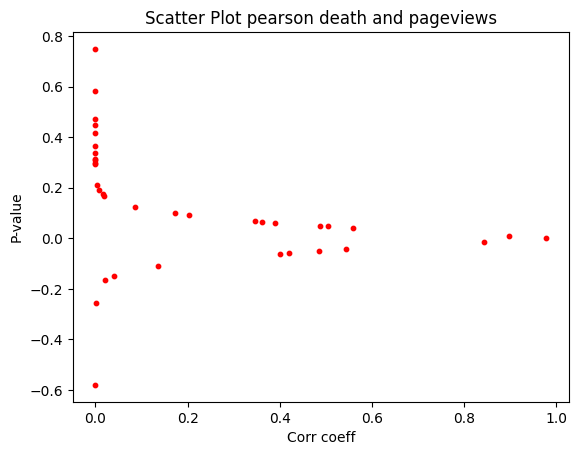

In [478]:
# create a new figure
plt.figure()

# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(pearson_deaths.loc[1][1:], pearson_deaths.loc[0][1:], color="red", s=10)

# add a title
plt.title("Scatter Plot pearson death and pageviews")

# add x and y axis labels
plt.xlabel("Corr coeff")
plt.ylabel("P-value")

# show the plot
plt.show()

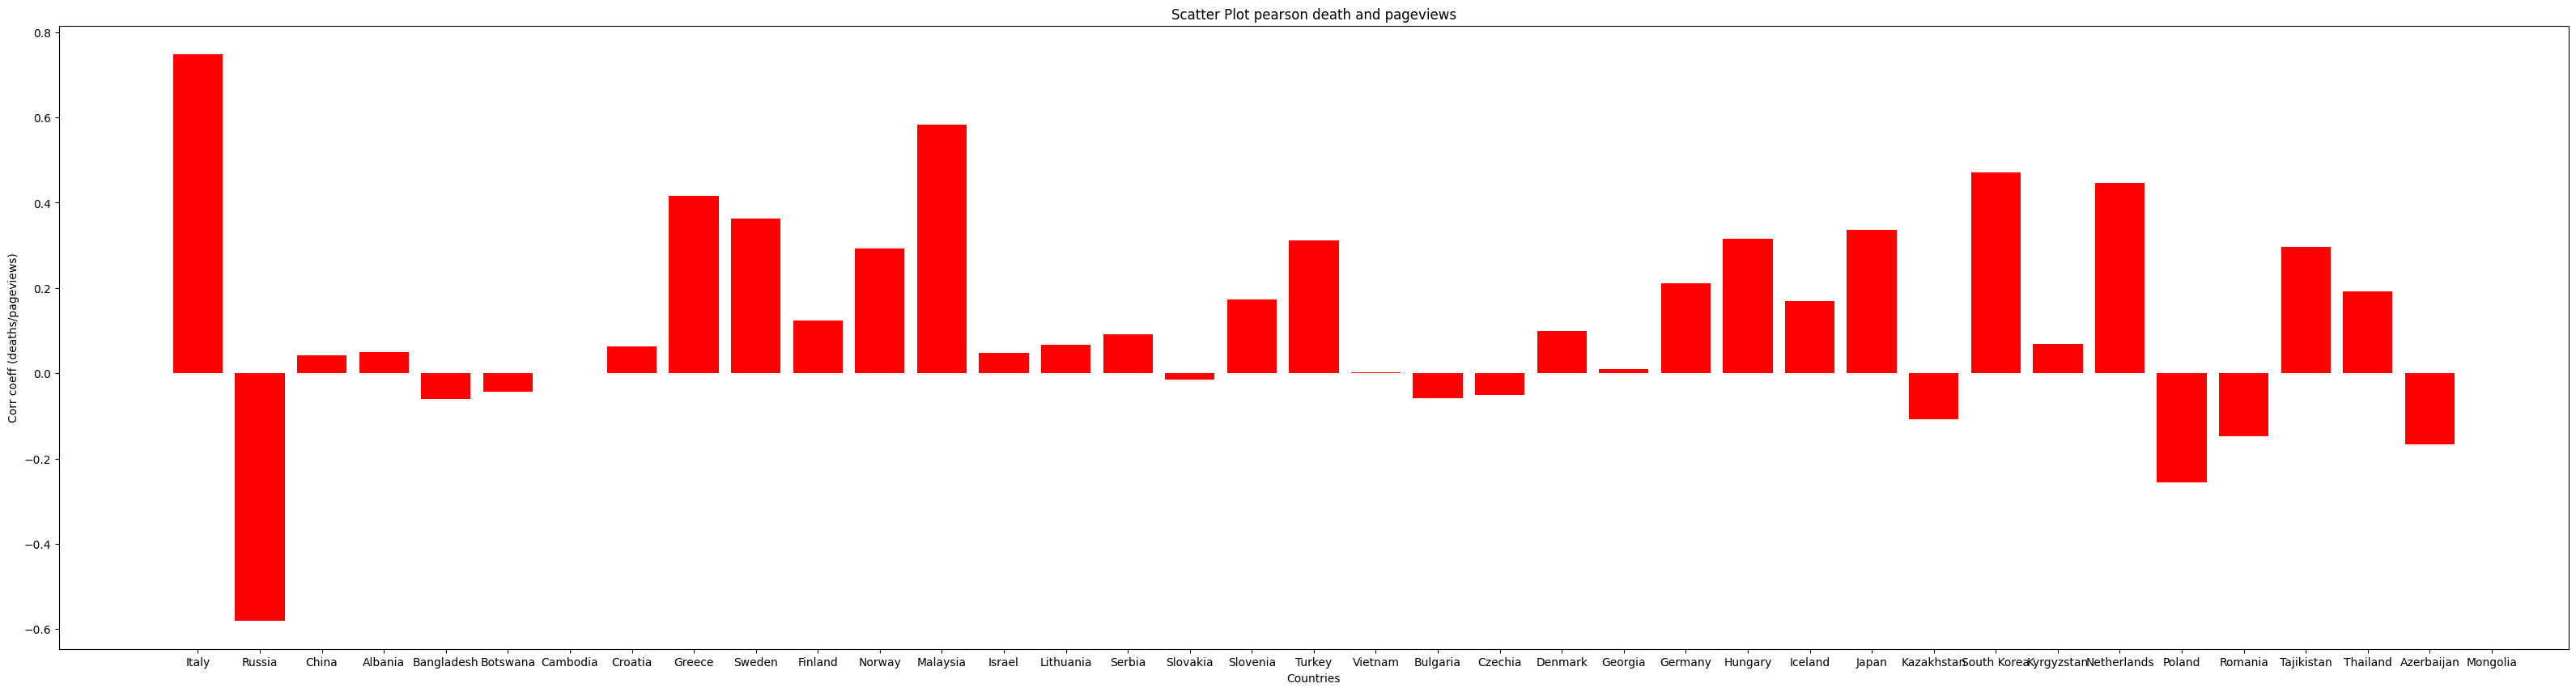

In [479]:
pearson_deathsT = pearson_deaths.transpose()
pearson_deathsT = pearson_deathsT.drop(index= 'Pearson correlation', axis=0)
pearson_deathsT = pearson_deathsT.rename(columns= {0: 'Correlation coefficient', 1: 'P-value'})
# create a new figure
plt.figure(figsize=(40, 10))

# use the scatter() function to plot the points,
# with red circles of size 10
plt.bar(pearson_deathsT.index.values, pearson_deathsT['Correlation coefficient'].values, color="red")

# add a title
plt.title("Scatter Plot pearson death and pageviews")

# add x and y axis labels
plt.xlabel("Countries")
plt.ylabel("Corr coeff (deaths/pageviews)")

# show the plot
plt.show()

### Loading population by countries

In [480]:
COUNTRY_OWN_LANG_POP = {"Italy" : "it", "Russian Federation": "ru", "China": "zh", "Albania": "sq", 
 "Bangladesh": "bn", "Botswana": "tn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovak Republic": "sk", "Slovenia": "sl", "Turkiye": "tr",
 "Vietnam": "vi", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Iceland": "is", "Japan": "ja", "Kazakhstan": "kk", "Korea, Rep.": "ko", "Kyrgyz Republic": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Tajikistan": "tg", "Thailand": "th", "Azerbaijan": "az", "Mongolia": "mn"}

#changed_name_countries = {"Russian Federation": "Russia", "Slovak Republic": "Slovakia", "Turkiye": "Turkey",
# "Korea, Rep.": "South Korea", "Kyrgyz Republic": 'Kyrgyzstan'}

population_df = pd.read_csv("Population_countries.csv")
population_df = population_df[["Country Name", "2020"]]
population_df = population_df.set_index("Country Name")
population_df = population_df.transpose()
population_df = population_df[list(COUNTRY_OWN_LANG_POP.keys())]
population_df = population_df.rename(columns= COUNTRY_OWN_LANG_POP)
population_df = population_df.transpose()
population_df.head()

,2020
Country Name,
it,5.944953e+07
ru,1.440731e+08
zh,1.411100e+09
sq,2.837849e+06
bn,1.646894e+08


## Check different metrics for pageviews, death and cases

### 1. Pageviews

In [481]:
pageviews_amean = (df_pageviews_pearson.mean()/population_df['2020']) * 100000
pageviews_max = (df_pageviews_pearson.max()/population_df['2020']) * 100000
pageviews_min = (df_pageviews_pearson.min()/population_df['2020']) * 100000
pageviews_median = (df_pageviews_pearson.median()/population_df['2020']) * 100000


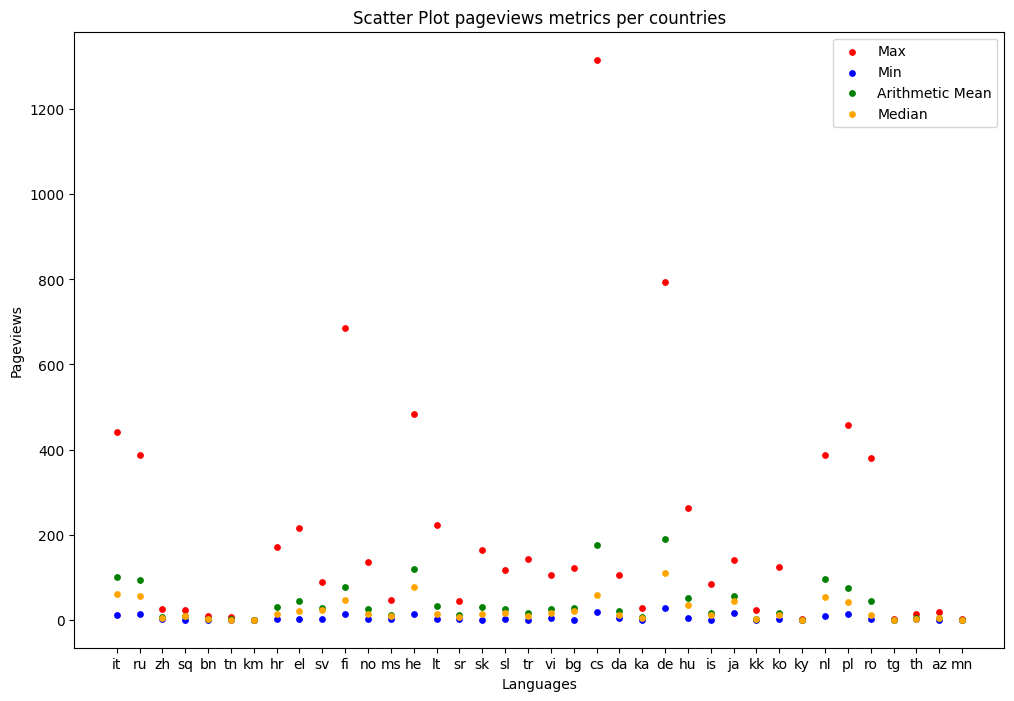

In [482]:

# create a new figure
plt.figure(figsize=(12, 8))
# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(pageviews_max.index, pageviews_max.values, color="red", s= 15)
plt.scatter(pageviews_min.index, pageviews_min.values, color="blue", s= 15)
plt.scatter(pageviews_amean.index, pageviews_amean.values, color="green", s= 15)
plt.scatter(pageviews_median.index, pageviews_median.values, color="orange", s= 15)
# add a title
plt.title("Scatter Plot pageviews metrics per countries")

# add x and y axis labels
plt.xlabel("Languages")
plt.ylabel("Pageviews")
plt.legend(["Max", "Min", "Arithmetic Mean", "Median"])

# show the plot
plt.show()

### 1. Covid-19 dataset
We have to select the variable between covid cases and covid deaths that create the most variability between the countries. Moreover, we also have to choose a represenative metric such as mean, min or max. 

Let's first plot the covid deaths for all the countries per 100 000 people, looking at the mean,min,max. 

In [483]:
deaths_lang_code = deaths.rename(columns= country_dict)[country_dict.values()]
deaths_amean = (deaths_lang_code.mean()/population_df['2020']) * 100000
deaths_max = (deaths_lang_code.max()/population_df['2020']) * 100000
deaths_min = (deaths_lang_code.min()/population_df['2020']) * 100000
deaths_median = (deaths_lang_code.median()/population_df['2020']) * 100000


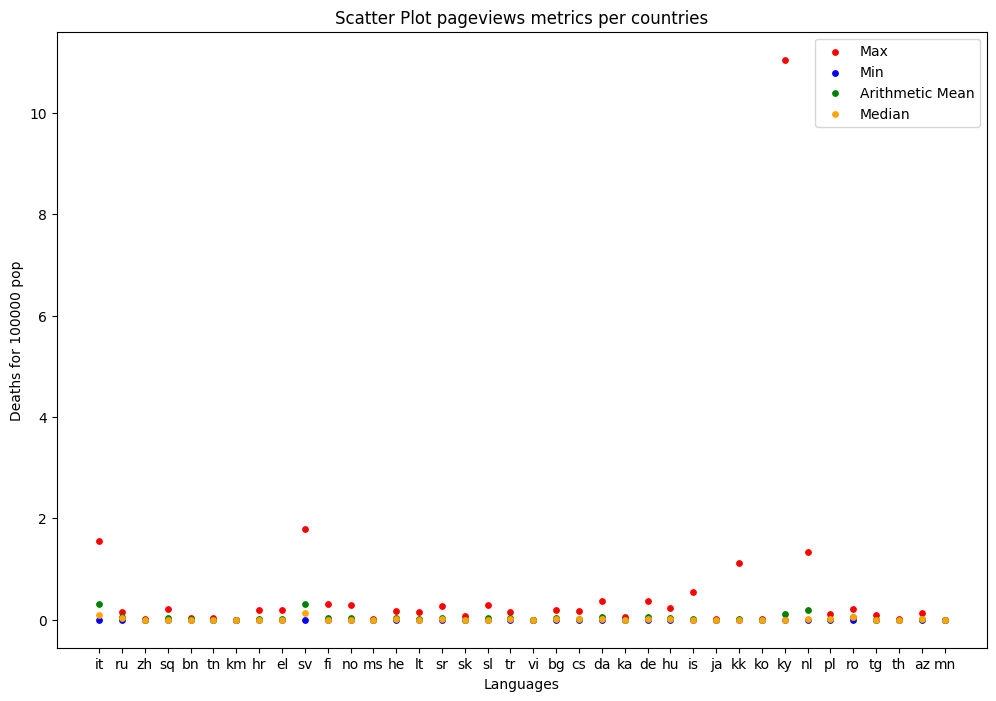

In [484]:
# create a new figure
plt.figure(figsize=(12, 8))
# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(deaths_max.index, deaths_max.values, color="red", s= 15)
plt.scatter(deaths_min.index, deaths_min.values, color="blue", s= 15)
plt.scatter(deaths_amean.index, deaths_amean.values, color="green", s= 15)
plt.scatter(deaths_median.index, deaths_median.values, color="orange", s= 15)
# add a title
plt.title("Scatter Plot pageviews metrics per countries")

# add x and y axis labels
plt.xlabel("Languages")
plt.ylabel("Deaths for 100000 pop")
plt.legend(["Max", "Min", "Arithmetic Mean", "Median"])

# show the plot
plt.show()


Now, let's look at covid cases for 100 000 people per country

In [485]:
cases_lang_code = cases.rename(columns= country_dict)[country_dict.values()]
cases_amean = (cases_lang_code.mean()/population_df['2020']) * 100000
cases_max = (cases_lang_code.max()/population_df['2020']) * 100000
cases_min = (cases_lang_code.min()/population_df['2020']) * 100000
cases_median = (cases_lang_code.median()/population_df['2020']) * 100000

Looking at both plots, we see that the max value gives much more variance between the countries than mean or min, therefore this metric is chosen for the clustering. Moreover, we also see that covid cases also shows more variance than covid deaths between the countries, therefore the max of covid cases is chosen for the clustering of countries. 

In [486]:
data_folder = 'data_2/'
df_trust_gov = pd.read_csv(data_folder+'share-who-trust-government.csv.zip') 
df_trust_science = pd.read_csv(data_folder+'share-people-trust-science.csv.zip')
df_trust_journalists = pd.read_csv(data_folder+'share-people-trust-journalists-country.csv.zip')

In [487]:
COUNTRY_OWN_LANG_TRUST_JOURN = {"Italy" : "it", "Russia": "ru", "China": "zh", "Albania": "sq", 
"Bangladesh": "bn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovakia": "sk", "Slovenia": "sl", "Turkey": "tr",
 "Vietnam": "vi", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Japan": "ja", "Kazakhstan": "kk", "South Korea": "ko", "Kyrgyzstan": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Tajikistan": "tg", "Thailand": "th", "Mongolia": "mn"}

COUNTRY_OWN_LANG_TRUST_GOV = {"Italy" : "it", "Russia": "ru", "Albania": "sq", 
"Bangladesh": "bn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovakia": "sk", "Slovenia": "sl", "Turkey": "tr", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Japan": "ja", "Kazakhstan": "kk", "South Korea": "ko", "Kyrgyzstan": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Thailand": "th", "Mongolia": "mn"}

COUNTRY_OWN_LANG_SCIENCE = {"Italy" : "it", "Russia": "ru", "China": "zh", "Albania": "sq", 
"Bangladesh": "bn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovakia": "sk", "Slovenia": "sl", "Turkey": "tr",
 "Vietnam": "vi", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Japan": "ja", "Kazakhstan": "kk", "South Korea": "ko", "Kyrgyzstan": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Tajikistan": "tg", "Thailand": "th", "Mongolia": "mn"}


df_trust_journalists = df_trust_journalists.set_index("Entity")[["Trust journalists in this country"]].transpose()[COUNTRY_OWN_LANG_TRUST_JOURN.keys()].rename(columns= COUNTRY_OWN_LANG_TRUST_JOURN)
df_trust_gov = df_trust_gov.set_index("Entity")[["Trust the national government in this country"]].transpose()[COUNTRY_OWN_LANG_TRUST_GOV.keys()].rename(columns= COUNTRY_OWN_LANG_TRUST_GOV)
df_trust_science = df_trust_science.set_index("Entity")[["Trust science"]].transpose()[COUNTRY_OWN_LANG_SCIENCE.keys()].rename(columns= COUNTRY_OWN_LANG_SCIENCE)
df_trust_science.head()

Entity,it,ru,zh,sq,bn,km,hr,el,sv,fi,...,ja,kk,ko,ky,nl,pl,ro,tg,th,mn
Trust science,93.4,75.9,95.9,64.7,73.5,81.4,89.5,83.0,97.0,94.1,...,86.2,77.8,90.4,82.9,90.3,87.2,79.5,88.5,86.1,86.0


In [488]:

#df_clustering_J_C_P = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Max cases'}).transpose()], axis= 0)
#df_clustering_J_C_P = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose()], axis= 0)

#df_clustering_J_C_P = df_clustering_J_C_P.transpose().dropna()
#df_clustering_J_C_P

In [489]:
# import hdbscan
# clusterer = hdbscan.HDBSCAN(algorithm='best', approx_min_span_tree=True, metric= 'chebyshev')
# clusterer.fit(DF_ARRAY)

# # px.scatter_3d(x=umap_data[:,0], y=umap_data[:,1], z=umap_data[:,2], color=clusterer.labels_.astype(str), title="UMAP => HDBSCAN")
# df_clustering_J_C_P['cluster'] = clusterer.labels_

# Clustering
## Max pageviews/ Max cases/ Trust Journ

In [490]:
df_clustering_MP_MC_J = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_MP_MC_J = df_clustering_MP_MC_J.transpose().dropna()

#quantile filter: discard 1% upper / lower values (robust option of removing outliers)
lim = np.logical_and(df_clustering_MP_MC_J < df_clustering_MP_MC_J.quantile(0.99, numeric_only=False),
                     df_clustering_MP_MC_J > df_clustering_MP_MC_J.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MC_J= df_clustering_MP_MC_J.where(lim, np.nan).dropna()

# df_clustering_MP_MC_J = df_clustering_MP_MC_J.loc[df_clustering_MP_MC_J['Max cases'] <= 100]
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
df_array = np.array(df_clustering_MP_MC_J.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 6)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MC_J['cluster'] = kmeans.labels_

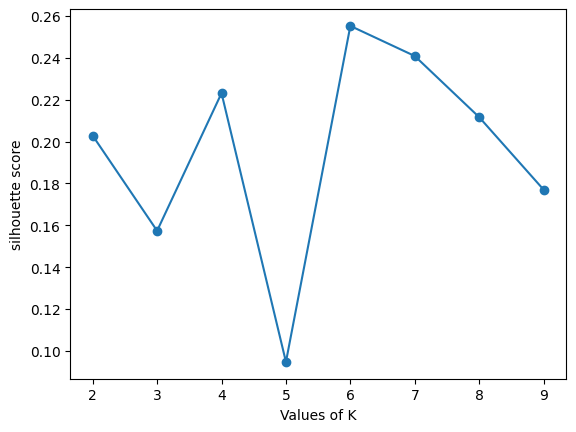

In [491]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [492]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MC_J.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MC_J[df_clustering_MP_MC_J.cluster == C]["Trust journalists in this country"],
                                y = df_clustering_MP_MC_J[df_clustering_MP_MC_J.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MC_J[df_clustering_MP_MC_J.cluster == C]['Max cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust journalists in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [493]:
df_clustering_MP_MC_J['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,1
Russia,1
China,4
Albania,4
Bangladesh,2
Croatia,5
Sweden,0
Finland,1
Malaysia,0
Israel,1


## Max pageviews/ Max deaths/ Trust Journ

In [494]:
df_clustering_MP_MD_J = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), deaths_max.to_frame().rename(columns= {0: 'Max deaths'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_MP_MD_J = df_clustering_MP_MD_J.transpose().dropna()

#quantile filter: discard 1% upper / lower values (robust option of removing outliers)
lim = np.logical_and(df_clustering_MP_MD_J < df_clustering_MP_MD_J.quantile(0.99, numeric_only=False),
                     df_clustering_MP_MD_J > df_clustering_MP_MD_J.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MD_J= df_clustering_MP_MD_J.where(lim, np.nan).dropna()

# df_clustering_MP_MC_J = df_clustering_MP_MC_J.loc[df_clustering_MP_MC_J['Max cases'] <= 100]
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
df_array = np.array(df_clustering_MP_MD_J.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 4)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MD_J['cluster'] = kmeans.labels_

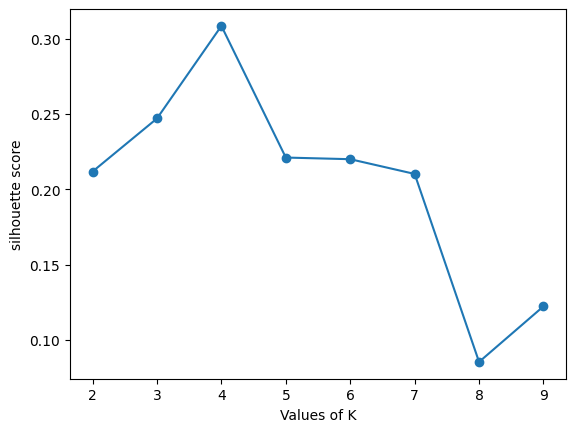

In [495]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [496]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MD_J.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MD_J[df_clustering_MP_MD_J.cluster == C]["Trust journalists in this country"],
                                y = df_clustering_MP_MD_J[df_clustering_MP_MD_J.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MD_J[df_clustering_MP_MD_J.cluster == C]['Max deaths'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust journalists in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max deaths', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [497]:
df_clustering_MP_MD_J['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,3
Russia,3
China,0
Albania,0
Bangladesh,0
Croatia,1
Sweden,2
Finland,3
Malaysia,2
Israel,3


## Max pageviews/ Max deaths/ Trust Science

In [498]:
df_clustering_MP_MD_S = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(),deaths_max.to_frame().rename(columns= {0: 'Max deaths'}).transpose(), df_trust_science], axis= 0)
df_clustering_MP_MD_S = df_clustering_MP_MD_S.transpose().dropna()

#quantile filter: discard 1% upper / lower values (robust option of removing outliers)
lim = np.logical_and(df_clustering_MP_MD_S < df_clustering_MP_MD_S.quantile(0.99, numeric_only=False),
                     df_clustering_MP_MD_S > df_clustering_MP_MD_S.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MD_S = df_clustering_MP_MD_S.where(lim, np.nan).dropna()

# df_clustering_MP_MC_J = df_clustering_MP_MC_J.loc[df_clustering_MP_MC_J['Max cases'] <= 100]
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
df_array = np.array(df_clustering_MP_MD_S.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 3)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MD_S['cluster'] = kmeans.labels_

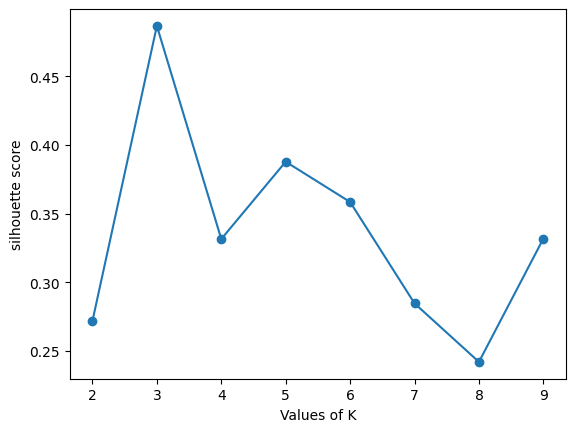

In [499]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [500]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MD_S.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MD_S[df_clustering_MP_MD_S.cluster == C]["Trust science"],
                                y = df_clustering_MP_MD_S[df_clustering_MP_MD_S.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MD_S[df_clustering_MP_MD_S.cluster == C]['Max deaths'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust science', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max deaths', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [501]:
df_clustering_MP_MD_S['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,2
Russia,2
China,1
Albania,1
Bangladesh,1
Croatia,0
Greece,2
Finland,2
Norway,0
Israel,2


## Max pageviews/ Max cases/ Trust Science

In [502]:
df_clustering_MP_MC_S = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose(), df_trust_science], axis= 0)
df_clustering_MP_MC_S = df_clustering_MP_MC_S.transpose().dropna()

#quantile filter: discard 1% upper / lower values (robust option of removing outliers)
lim = np.logical_and(df_clustering_MP_MC_S < df_clustering_MP_MC_S.quantile(0.99, numeric_only=False),
                     df_clustering_MP_MC_S > df_clustering_MP_MC_S.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MC_S = df_clustering_MP_MC_S.where(lim, np.nan).dropna()

# df_clustering_MP_MC_J = df_clustering_MP_MC_J.loc[df_clustering_MP_MC_J['Max cases'] <= 100]
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
df_array = np.array(df_clustering_MP_MC_S.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 4)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MC_S['cluster'] = kmeans.labels_

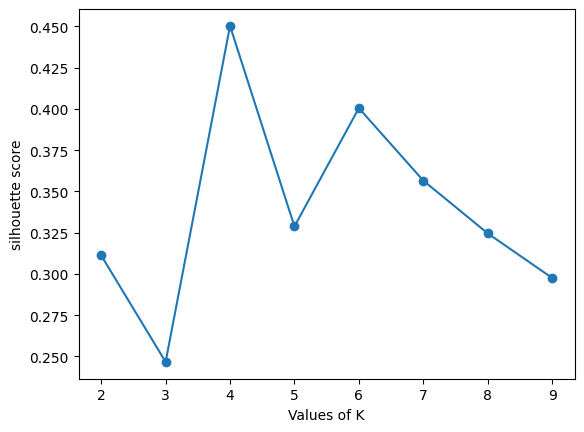

In [503]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [504]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MC_S.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MC_S[df_clustering_MP_MC_S.cluster == C]["Trust science"],
                                y = df_clustering_MP_MC_S[df_clustering_MP_MC_S.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MC_S[df_clustering_MP_MC_S.cluster == C]['Max cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust science', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [505]:
df_clustering_MP_MC_S['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,2
Russia,2
China,1
Albania,1
Bangladesh,1
Croatia,0
Greece,2
Finland,2
Norway,0
Israel,2


## Clustering Pearson cases/trust government

In [506]:
df_clustering_Pears__G = pd.concat([pearson_cases_Kmeans.to_frame().rename(columns= {0: 'Pearsons cases'}).transpose(), df_trust_gov], axis= 0)
df_clustering_Pears__G = df_clustering_Pears__G.transpose().dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
#lim = np.logical_and(df_clustering_Pears__G  < df_clustering_Pears__G .quantile(0.99, numeric_only=False),
#                     df_clustering_Pears__G  > df_clustering_Pears__G .quantile(0.01, numeric_only=False))

# replace outliers with nan
#df_clustering_Pears__G  = df_clustering_Pears__G .where(lim, np.nan).dropna()

# Preprocessing the data
df_array = np.array(df_clustering_Pears__G.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_Pears__G['cluster'] = kmeans.labels_

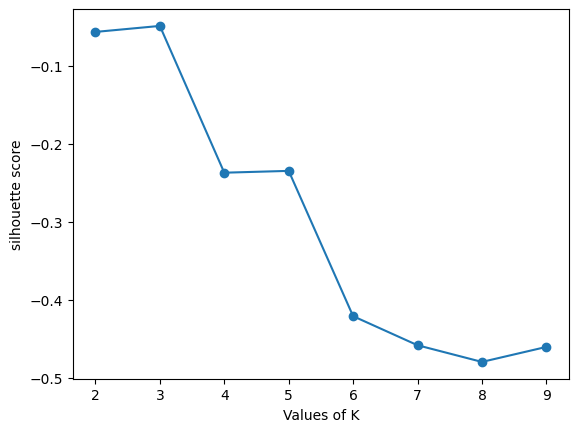

In [507]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [508]:
df_clustering_Pears__G['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,0
Russia,1
Albania,1
Bangladesh,1
Cambodia,1
Croatia,0
Greece,0
Sweden,1
Finland,1
Norway,0


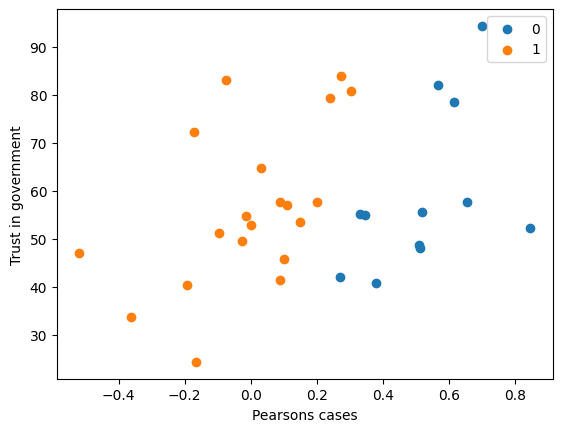

In [509]:
#plot 2d
for i in list(df_clustering_Pears__G.cluster.unique()):
    plt.scatter(df_clustering_Pears__G[df_clustering_Pears__G.cluster == i]["Pearsons cases"], df_clustering_Pears__G[df_clustering_Pears__G.cluster == i]["Trust the national government in this country"], label = i)
plt.xlabel("Pearsons cases")
plt.ylabel("Trust in government")
plt.legend()
plt.show()

In [510]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
data = pd.DataFrame()
data['y'] = pd.to_numeric(df_clustering_Pears__G['Trust the national government in this country'].values)
data['x'] = pd.to_numeric(df_clustering_Pears__G['Pearsons cases'].values)
#We apply a linear regression using as estimates OLS
model = smf.ols('y ~ x', data= data).fit()

results = model.summary()

#Show the results of the linear regression
print("Our model summary is:")
results

Our model summary is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     4.919
Date:                Tue, 13 Dec 2022   Prob (F-statistic):             0.0343
Time:                        15:53:38   Log-Likelihood:                -132.05
No. Observations:                  32   AIC:                             268.1
Df Residuals:                      30   BIC:                             271.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7618      3.213     16.730      0.000      47.199      60.325
x             19.1886      8.652      2.218      0.034       1.519      36.858
==============================================================================
Omnibus:                        2.391   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.907
Skew:                           0.451   Prob(JB):                        0.385
Kurtosis:                       2.215   Cond. No.                         3.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

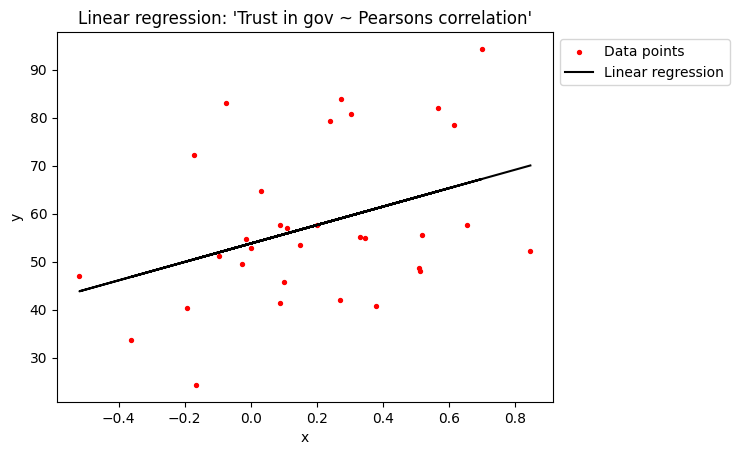

In [511]:
intercept = model.params[0]
x_coef = model.params[1]
plt.scatter(data['x'], data['y'], s= 8, color= 'red', label= "Data points")
plt.plot(data['x'], intercept + x_coef * data['x'], color= 'black', label= 'Linear regression')
plt.title("""Linear regression: 'Trust in gov ~ Pearsons correlation'""")
plt.ylabel('y')
plt.xlabel('x') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

## Clustering Pearson cases/Journalists

In [512]:
df_clustering_Pears__J = pd.concat([pearson_cases_Kmeans.to_frame().rename(columns= {0: 'Pearsons cases'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_Pears__J = df_clustering_Pears__J.transpose().dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
#lim = np.logical_and(df_clustering_Pears__G  < df_clustering_Pears__G .quantile(0.99, numeric_only=False),
#                     df_clustering_Pears__G  > df_clustering_Pears__G .quantile(0.01, numeric_only=False))

# replace outliers with nan
#df_clustering_Pears__G  = df_clustering_Pears__G .where(lim, np.nan).dropna()

# Preprocessing the data
df_array = np.array(df_clustering_Pears__J.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_Pears__J['cluster'] = kmeans.labels_

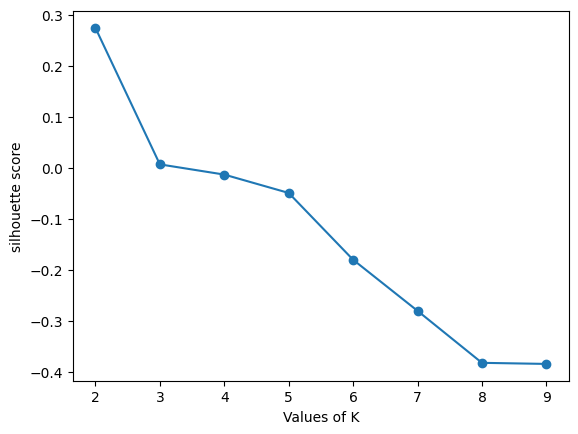

In [513]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

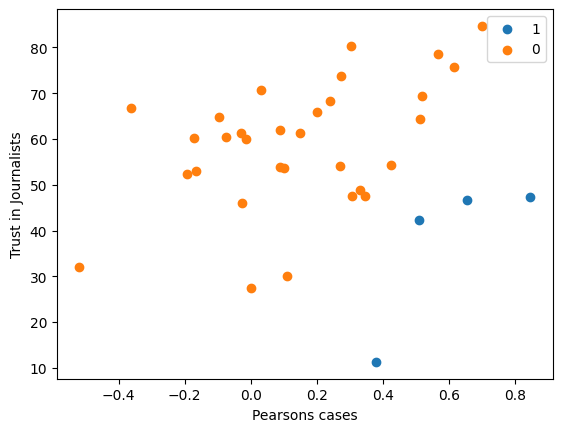

In [514]:
#plot 2d
for i in list(df_clustering_Pears__J.cluster.unique()):
    plt.scatter(df_clustering_Pears__J[df_clustering_Pears__J.cluster == i]["Pearsons cases"], df_clustering_Pears__J[df_clustering_Pears__J.cluster == i]["Trust journalists in this country"], label = i)
plt.xlabel("Pearsons cases")
plt.ylabel("Trust in Journalists")
plt.legend()
plt.show()

## Clustering Pearson cases/ Trust Science

In [515]:
df_clustering_Pears_S = pd.concat([pearson_cases_Kmeans.to_frame().rename(columns= {0: 'Pearsons cases'}).transpose(), df_trust_science], axis= 0)
df_clustering_Pears_S = df_clustering_Pears_S.transpose().dropna()

# Preprocessing the data
df_array = np.array(df_clustering_Pears_S.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_Pears_S['cluster'] = kmeans.labels_

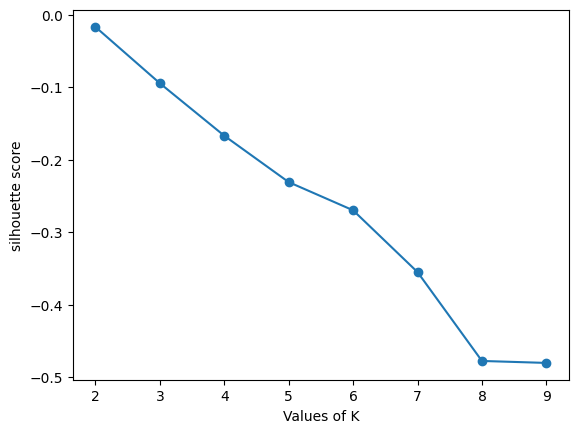

In [516]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

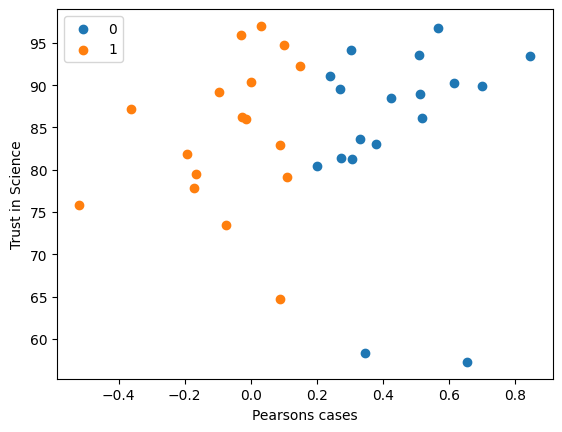

In [517]:
#plot 2d
for i in list(df_clustering_Pears_S.cluster.unique()):
    plt.scatter(df_clustering_Pears_S[df_clustering_Pears_S.cluster == i]["Pearsons cases"], df_clustering_Pears_S[df_clustering_Pears_S.cluster == i]["Trust science"], label = i)
plt.xlabel("Pearsons cases")
plt.ylabel("Trust in Science")
plt.legend()
plt.show()

In [518]:
data = pd.DataFrame()
data['y'] = pd.to_numeric(df_clustering_Pears_S['Trust science'].values)
data['x'] = pd.to_numeric(df_clustering_Pears_S['Pearsons cases'].values)
#We apply a linear regression using as estimates OLS
model = smf.ols('y ~ x', data= data).fit()

results = model.summary()

#Show the results of the linear regression
print("Our model summary is:")
results

Our model summary is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.4370
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.513
Time:                        15:53:40   Log-Likelihood:                -128.72
No. Observations:                  35   AIC:                             261.4
Df Residuals:                      33   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9179      1.981     42.370      0.000      79.888      87.948
x              3.5769      5.411      0.661      0.513      -7.432      14.586
==============================================================================
Omnibus:                       15.714   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.531
Skew:                          -1.411   Prob(JB):                     0.000156
Kurtosis:                       5.016   Cond. No.                         3.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Clustering Max pageviews/Max deaths/ trust government

In [519]:
df_clustering_MP_MD_G = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), deaths_max.to_frame().rename(columns= {0: 'Max deaths'}).transpose(), df_trust_gov], axis= 0)
df_clustering_MP_MD_G= df_clustering_MP_MD_G.transpose().dropna()

#drop outliers
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
lim = np.logical_and(df_clustering_MP_MD_G   < df_clustering_MP_MD_G.quantile(0.99, numeric_only=False),
                    df_clustering_MP_MD_G  > df_clustering_MP_MD_G.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MD_G   = df_clustering_MP_MD_G .where(lim, np.nan).dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MP_MD_G.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MD_G['cluster'] = kmeans.labels_

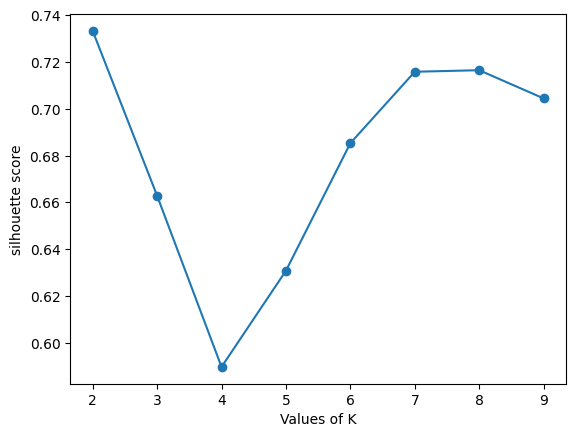

In [520]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM, model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [521]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MD_G.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MD_G[df_clustering_MP_MD_G.cluster == C]["Trust the national government in this country"],
                                y = df_clustering_MP_MD_G[df_clustering_MP_MD_G.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MD_G[df_clustering_MP_MD_G.cluster == C]['Max deaths'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust gov in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max deaths', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Clustering Max pageviews/Max cases/ trust government

In [522]:
df_clustering_MP_MC_G = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose(), df_trust_gov], axis= 0)
df_clustering_MP_MC_G= df_clustering_MP_MC_G.transpose().dropna()

#drop outliers
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
lim = np.logical_and(df_clustering_MP_MC_G   < df_clustering_MP_MC_G.quantile(0.99, numeric_only=False),
                    df_clustering_MP_MC_G  > df_clustering_MP_MC_G.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MC_G   = df_clustering_MP_MC_G .where(lim, np.nan).dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MP_MC_G.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MC_G['cluster'] = kmeans.labels_




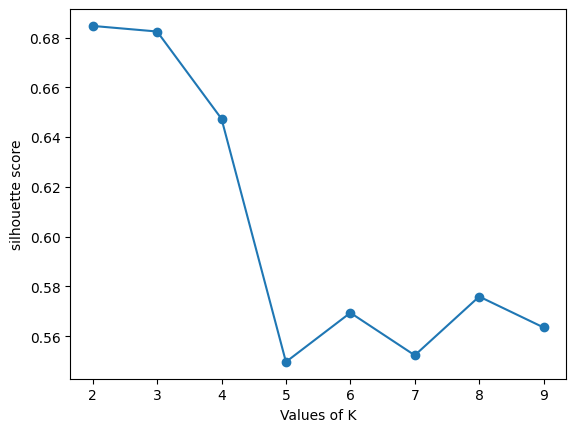

In [523]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM, model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [524]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MC_G.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MC_G[df_clustering_MP_MC_G.cluster == C]["Trust the national government in this country"],
                                y = df_clustering_MP_MC_G[df_clustering_MP_MC_G.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MC_G[df_clustering_MP_MC_G.cluster == C]['Max cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust gov in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Clustering Mean pageviews/Mean cases/ trust government

In [525]:
df_clustering_MeanP_MeanC_P = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Mean pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Mean cases'}).transpose(), df_trust_gov], axis= 0)
df_clustering_MeanP_MeanC_P= df_clustering_MeanP_MeanC_P.transpose().dropna()

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MeanP_MeanC_P.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data
# x = df_clustering_MeanP_MeanC_P.values
# DF_NORM  = preprocessing.normalize(x)
# Creating our Model
kmeans = KMeans(n_clusters =5)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MeanP_MeanC_P ['cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_ 

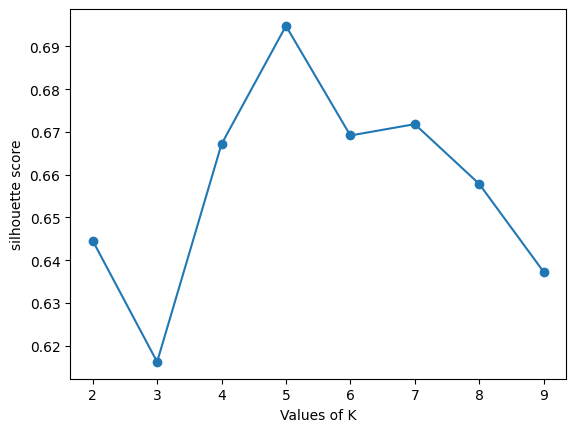

In [526]:

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [527]:
df_clustering_MeanP_MeanC_P['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,0
Russia,0
Albania,1
Bangladesh,3
Cambodia,3
Croatia,2
Greece,4
Sweden,2
Finland,4
Norway,1


In [528]:
PLOT = go.Figure()

for C in list(df_clustering_MeanP_MeanC_P.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MeanP_MeanC_P[df_clustering_MeanP_MeanC_P.cluster == C]["Trust the national government in this country"],
                                y = df_clustering_MeanP_MeanC_P[df_clustering_MeanP_MeanC_P.cluster == C]['Mean pageview'],
                                z = df_clustering_MeanP_MeanC_P[df_clustering_MeanP_MeanC_P.cluster == C]['Mean cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust gov in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Mean pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Mean cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Clustering Mean pageviews/Mean cases/ trust journalists

In [529]:
df_clustering_MeanP_MeanC_J = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Mean pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Mean cases'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_MeanP_MeanC_J= df_clustering_MeanP_MeanC_J.transpose().dropna()

# # OPTION 2: quantile filter: discard 1% upper / lower values (robust option of removing outliers)
# lim = np.logical_and(df_clustering_MeanP_MeanC_J < df_clustering_MeanP_MeanC_J.quantile(0.99, numeric_only=False),
#                      df_clustering_MeanP_MeanC_J > df_clustering_MeanP_MeanC_J.quantile(0.01, numeric_only=False))

# # replace outliers with nan
# df_clustering_MeanP_MeanC_J= df_clustering_MeanP_MeanC_J.where(lim, np.nan).dropna()
# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MeanP_MeanC_J.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 5)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MeanP_MeanC_J ['cluster'] = kmeans.labels_

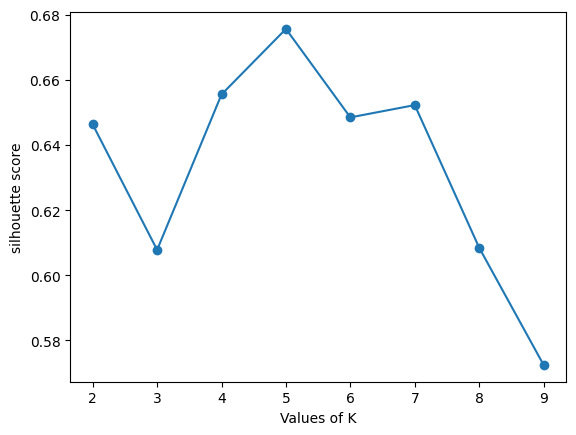

In [530]:

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [531]:
df_clustering_MeanP_MeanC_P['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,0
Russia,0
Albania,1
Bangladesh,3
Cambodia,3
Croatia,2
Greece,4
Sweden,2
Finland,4
Norway,1


In [532]:
PLOT = go.Figure()

for C in list(df_clustering_MeanP_MeanC_P.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MeanP_MeanC_J[df_clustering_MeanP_MeanC_J.cluster == C]["Trust journalists in this country"],
                                y = df_clustering_MeanP_MeanC_J[df_clustering_MeanP_MeanC_J.cluster == C]['Mean pageview'],
                                z = df_clustering_MeanP_MeanC_J[df_clustering_MeanP_MeanC_J.cluster == C]['Mean cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust Journalists in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Mean pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Mean cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [533]:
#Test affinity
#
#
#
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

# initialize the data set we'll work with
training_data  = preprocessing.normalize(df_clustering_MP_MC_J.values)

# define the model
model = AffinityPropagation(damping=0.6)

# train the model
model.fit(training_data)

# assign each data point to a cluster
result = model.predict(training_data)

df_clustering_MP_MC_J['cluster'] = result

## Clustering Mean pageviews/Mean cases/ trust science

In [534]:
df_clustering_MeanP_MeanC_S = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Mean pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Mean cases'}).transpose(), df_trust_science], axis= 0)
df_clustering_MeanP_MeanC_S = df_clustering_MeanP_MeanC_S.transpose().dropna()

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MeanP_MeanC_S.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MeanP_MeanC_S ['cluster'] = kmeans.labels_

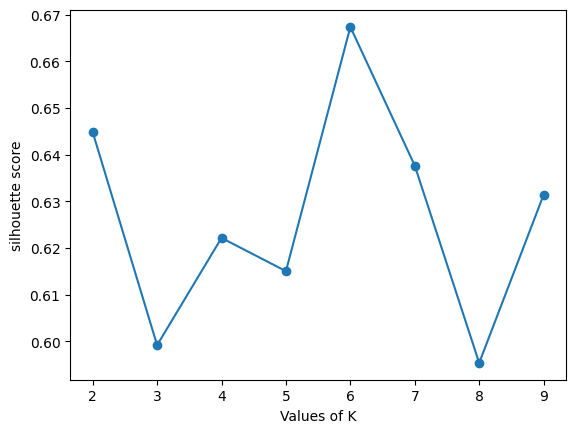

In [535]:

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [536]:
PLOT = go.Figure()

for C in list(df_clustering_MeanP_MeanC_S.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MeanP_MeanC_S[df_clustering_MeanP_MeanC_S.cluster == C]["Trust science"],
                                y = df_clustering_MeanP_MeanC_S[df_clustering_MeanP_MeanC_S.cluster == C]['Mean pageview'],
                                z = df_clustering_MeanP_MeanC_S[df_clustering_MeanP_MeanC_S.cluster == C]['Mean cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust science', titlefont_color = 'black'),
                                yaxis=dict(title = 'Mean pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Mean cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

### Feature selection for mobility

In [537]:
data_folder = 'data_2/'

#Download mobility and intervention files
google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv.zip')
interventions = pd.read_csv(data_folder+'interventions.csv.zip')

#Download file with covid pageviews #MODIFY WITH THE NEW DATA
file = gzip.open(data_folder+'aggregated_timeseries.json.gz')
data = json.load(file)

/var/folders/n2/lkxf5xgn5qd0l88pblwqxc6h0000gn/T/ipykernel_3354/3845124504.py:4: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [538]:
#Change name of the columns
categories = ["Retail and Recreations", "Grocery and Pharmacy", "Parks","Transit stations", "Workplace", "Residential"]
google_mobility = google_mobility.rename(dict(zip(google_mobility.columns[8:],names)), axis = 1)

#Transform date string to datetime
google_mobility['date'] = pd.to_datetime(google_mobility['date'])

#Delete columns about region
google_mobility = google_mobility.drop(google_mobility.iloc[:,2:7], axis = 1)

#Keep same dates as for corona wikipedia pages
google_mobility = google_mobility.loc[(google_mobility['date'] < "2020-08-01") & (google_mobility['date'] >= "2020-01-22")]

#Regroup all data per country and per date and take the average
mobility = google_mobility.groupby(["country_region_code","country_region","date"]).mean()

#Keep only the country that we are interested in
mobility = mobility[mobility.index.get_level_values('country_region').isin(list(country_dict.keys()))]

mobility

Retail and Recreations  \
country_region_code country_region date                                 
BD                  Bangladesh     2020-02-15                4.000000   
                                   2020-02-16                3.000000   
                                   2020-02-17                1.000000   
                                   2020-02-18                2.000000   
                                   2020-02-19                1.000000   
...                                                               ...   
VN                  Vietnam        2020-07-27               -8.765625   
                                   2020-07-28               -9.546875   
                                   2020-07-29              -13.593750   
                                   2020-07-30              -15.484375   
                                   2020-07-31              -16.359375   

                                               Grocery and Pharmacy  \
country_region_code country_region date                               
BD                  Bangladesh     2020-02-15              6.000000   
                                   2020-02-16              3.000000   
                                   2020-02-17              4.000000   
                                   2020-02-18              3.000000   
                                   2020-02-19              1.000000   
...                                                             ...   
VN                  Vietnam        2020-07-27              8.500000   
                                   2020-07-28              7.508197   
                                   2020-07-29              2.000000   
                                   2020-07-30             -1.836066   
                                   2020-07-31             -3.688525   

                                                   Parks  Transit stations  \
country_region_code country_region date                                      
BD                  Bangladesh     2020-02-15  10.000000          7.000000   
                                   2020-02-16   5.000000          4.000000   
                                   2020-02-17   3.000000          2.000000   
                                   2020-02-18   2.000000          3.000000   
                                   2020-02-19   3.000000          2.000000   
...                                                  ...               ...   
VN                  Vietnam        2020-07-27  -9.532258         -1.931034   
                                   2020-07-28  -9.467742         -1.413793   
                                   2020-07-29 -14.365079         -5.694915   
                                   2020-07-30 -15.812500        -11.033898   
                                   2020-07-31 -17.265625        -12.155172   

                                               Workplace  Residential  
country_region_code country_region date                                
BD                  Bangladesh     2020-02-15    8.00000     1.000000  
                                   2020-02-16    8.00000     0.000000  
                                   2020-02-17    5.00000     1.000000  
                                   2020-02-18    5.00000     1.000000  
                                   2020-02-19    5.00000     1.000000  
...                                                  ...          ...  
VN                  Vietnam        2020-07-27   -3.40625     4.258065  
                                   2020-07-28    1.62500     4.322581  
                                   2020-07-29    0.50000     3.838710  
                                   2020-07-30   -2.34375     3.096774  
                                   2020-07-31  -15.21875     6.904762  

[5622 rows x 6 columns]

In [539]:
#Keep only page views since February 15th to compare with mobility
df_pageviews_pearson = df_pageviews_pearson.loc[df_pageviews_pearson.index >= '2020-02-15']

In [540]:
pearson_cases = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    #Discard countries that are not in the mobility table or with less values --> 32 countries
    if (len(mobility[mobility.index.get_level_values('country_region')==country[0]])==168):
        correlation_table = pd.DataFrame({"Pearson correlation for {}".format(str(country[0])):["Correlation coefficient:","P-value:"]})
        for category in categories:
            corr, p_value = stats.pearsonr(mobility[mobility.index.get_level_values('country_region')==country[0]][category], df_pageviews_pearson[country[1]])
            output_df = pd.DataFrame({str(category):[corr, p_value] })
            correlation_table = pd.concat([correlation_table, output_df], axis=1)
        display(correlation_table)

,Pearson correlation for Italy,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-7.155776e-01,-5.936394e-01,-7.024954e-01,-6.970831e-01,-6.447317e-01,7.303140e-01
1,P-value:,1.172740e-27,2.244492e-17,2.642898e-26,9.129929e-26,4.077236e-21,2.825568e-29


,Pearson correlation for Russia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-0.150929,-0.206772,-5.543676e-01,-0.234417,0.009176,3.782907e-01
1,P-value:,0.050836,0.007163,6.394692e-15,0.002225,0.906028,4.286838e-07


,Pearson correlation for Bangladesh,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-8.451761e-01,-8.502287e-01,-7.718188e-01,-8.372798e-01,-7.986673e-01,8.372087e-01
1,P-value:,5.022961e-47,3.990290e-48,1.811373e-34,2.205296e-45,1.875941e-38,2.279524e-45


,Pearson correlation for Botswana,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,0.156687,0.216464,0.356352,0.110408,0.123370,-0.018606
1,P-value:,0.042532,0.004829,0.000002,0.154238,0.111112,0.810808


,Pearson correlation for Cambodia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.180704e-01,-4.100782e-01,-4.170688e-01,-4.818324e-01,-3.874700e-01,4.623204e-01
1,P-value:,1.712738e-08,3.384712e-08,1.867196e-08,3.780278e-11,2.116134e-07,2.813409e-10


,Pearson correlation for Croatia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-6.818570e-01,-4.721545e-01,-5.116658e-01,-6.122416e-01,-5.270208e-01,6.812460e-01
1,P-value:,2.586817e-24,1.039339e-10,1.360151e-12,1.167839e-18,2.157457e-13,2.945786e-24


,Pearson correlation for Greece,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-7.577952e-01,-5.133867e-01,-6.601193e-01,-7.239536e-01,-7.551904e-01,8.044502e-01
1,P-value:,1.346852e-32,1.111614e-12,2.187677e-22,1.453257e-28,2.903531e-32,2.164315e-39


,Pearson correlation for Sweden,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.677811e-01,-3.949754e-01,-0.365334,-5.696915e-01,-0.039579,4.631680e-01
1,P-value:,1.008973e-15,1.169038e-07,0.000001,7.703493e-16,0.610495,2.585196e-10


,Pearson correlation for Finland,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-0.322457,-0.332729,-4.610880e-01,-0.171881,0.098315,0.306622
1,P-value:,0.000020,0.000010,3.180298e-10,0.025893,0.204846,0.000053


,Pearson correlation for Norway,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.631164e-01,-0.269885,-5.564616e-01,-4.196560e-01,-0.096470,5.071573e-01
1,P-value:,1.935824e-15,0.000403,4.819400e-15,1.493059e-08,0.213516,2.295462e-12


,Pearson correlation for Malaysia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.391789e-01,-4.657814e-01,-4.198555e-01,-3.688920e-01,-5.065605e-01,4.709730e-01
1,P-value:,2.596060e-09,1.988796e-10,1.467413e-08,8.639263e-07,2.458705e-12,1.173391e-10


,Pearson correlation for Israel,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-6.871767e-01,-4.131971e-01,-6.388424e-01,-7.467412e-01,-6.013595e-01,6.660573e-01
1,P-value:,8.231292e-25,2.600123e-08,1.195599e-20,3.287446e-31,6.737153e-18,6.754163e-23


,Pearson correlation for Lithuania,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.461644e-01,-6.113616e-01,-5.416255e-01,-5.379859e-01,-0.33358,5.611065e-01
1,P-value:,1.900315e-14,1.349015e-18,3.428105e-14,5.467092e-14,0.00001,2.555287e-15


,Pearson correlation for Slovakia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.257579e-01,-0.172704,-5.682747e-01,-4.007759e-01,-0.284095,4.419601e-01
1,P-value:,8.745192e-09,0.025180,9.411760e-16,7.315388e-08,0.000190,2.004988e-09


,Pearson correlation for Slovenia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.220801e-01,-0.133697,-5.402821e-01,-0.243117,-0.225305,4.491304e-01
1,P-value:,1.208757e-08,0.084035,4.075309e-14,0.001496,0.003321,1.018912e-09


,Pearson correlation for Turkey,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.747002e-01,-3.774430e-01,-5.200076e-01,-4.463931e-01,-4.333066e-01,4.792597e-01
1,P-value:,7.989967e-11,4.570702e-07,5.060030e-13,1.321814e-09,4.445606e-09,4.961660e-11


,Pearson correlation for Vietnam,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.966125e-01,-6.835820e-01,-3.699098e-01,-6.851856e-01,-4.109671e-01,6.326131e-01
1,P-value:,1.417433e-17,1.789218e-24,8.016420e-07,1.267203e-24,3.140502e-08,3.638148e-20


,Pearson correlation for Bulgaria,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-8.058374e-01,-7.136248e-01,-7.089737e-01,-7.732478e-01,-6.156028e-01,7.292189e-01
1,P-value:,1.275462e-39,1.887766e-27,5.774168e-27,1.147717e-34,6.703830e-19,3.758309e-29


,Pearson correlation for Czechia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.307722e-01,-0.268572,-0.310543,-4.823821e-01,-0.191457,3.880297e-01
1,P-value:,5.589694e-09,0.000432,0.000042,3.565800e-11,0.012916,2.025567e-07


,Pearson correlation for Denmark,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.061933e-01,-4.468058e-01,-4.735018e-01,-5.161196e-01,-0.138954,4.311243e-01
1,P-value:,2.564688e-12,1.271128e-09,9.045381e-11,8.049413e-13,0.072442,5.415251e-09


,Pearson correlation for Germany,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-4.373543e-01,-0.127561,-5.309917e-01,-4.478664e-01,-0.200811,3.958254e-01
1,P-value:,3.071711e-09,0.099400,1.319833e-13,1.149358e-09,0.009054,1.092040e-07


,Pearson correlation for Hungary,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-6.964764e-01,-4.508346e-01,-4.914767e-01,-6.499988e-01,-5.069716e-01,6.168164e-01
1,P-value:,1.047288e-25,8.654797e-10,1.336368e-11,1.526745e-21,2.345100e-12,5.477386e-19


,Pearson correlation for Japan,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-0.230224,0.115633,0.106746,-0.240342,-0.042620,0.169639
1,P-value:,0.002680,0.135542,0.168452,0.001701,0.583319,0.027927


,Pearson correlation for Kazakhstan,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-0.085670,-0.118389,-0.342091,-0.203646,0.010692,0.190121
1,P-value:,0.269528,0.126408,0.000006,0.008105,0.890589,0.013572


,Pearson correlation for South Korea,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-3.814026e-01,-0.199902,0.002349,-0.353234,-0.109379,4.203234e-01
1,P-value:,3.382567e-07,0.009378,0.975897,0.000003,0.158138,1.408941e-08


,Pearson correlation for Kyrgyzstan,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,0.219268,0.235544,0.274276,0.185573,0.109737,-0.238784
1,P-value:,0.004295,0.002115,0.000321,0.016027,0.156771,0.001826


,Pearson correlation for Netherlands,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-6.290726e-01,-0.247585,-5.135670e-01,-4.198291e-01,-0.264395,4.939824e-01
1,P-value:,6.771856e-20,0.001214,1.088285e-12,1.470794e-08,0.000534,1.014540e-11


,Pearson correlation for Poland,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.206643e-01,-0.299637,-5.645723e-01,-3.935160e-01,-0.216735,4.193545e-01
1,P-value:,4.675700e-13,0.000080,1.581327e-15,1.313543e-07,0.004775,1.532624e-08


,Pearson correlation for Romania,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.722207e-01,-5.558192e-01,-5.446340e-01,-5.246045e-01,-3.778549e-01,5.543308e-01
1,P-value:,5.374915e-16,5.257302e-15,2.320886e-14,2.900395e-13,4.430586e-07,6.426460e-15


,Pearson correlation for Tajikistan,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.593848e-01,-5.514686e-01,-5.427381e-01,-5.582650e-01,-3.940140e-01,5.928234e-01
1,P-value:,3.236519e-15,9.428825e-15,2.968953e-14,3.771504e-15,1.262408e-07,2.544154e-17


,Pearson correlation for Thailand,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-0.214056,-4.080885e-01,-0.172406,-0.079330,0.028343,0.105814
1,P-value:,0.005334,3.999218e-08,0.025436,0.306698,0.715337,0.172221


,Pearson correlation for Mongolia,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,Correlation coefficient:,-5.042989e-01,-5.654228e-01,-6.544212e-01,-5.401775e-01,-0.131721,6.539333e-01
1,P-value:,3.186039e-12,1.404437e-15,6.592020e-22,4.130384e-14,0.088759,7.237114e-22


In [541]:
# Group together Parks, Retail and Recreations, Transit stations and Workplace by taking the mean of them
mobility['moving category'] = mobility[['Retail and Recreations', 'Parks', 'Transit stations', 'Workplace']].mean(axis=1)

#Group together Grocey and Pharmacy and Residential by taking the mean of them
mobility['covid category'] = mobility[['Grocery and Pharmacy', 'Residential']].mean(axis=1)

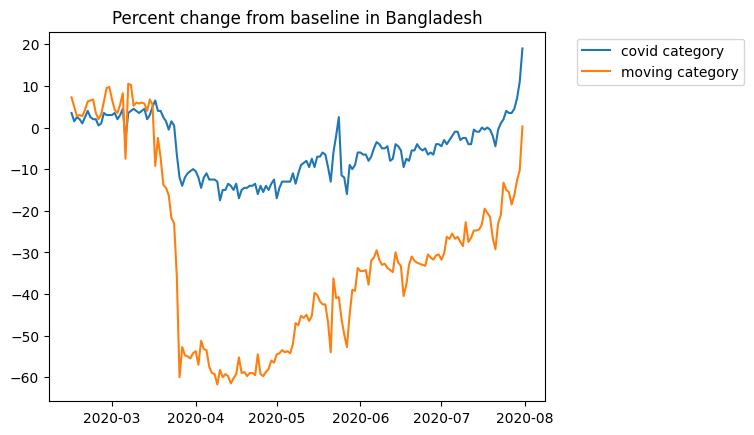

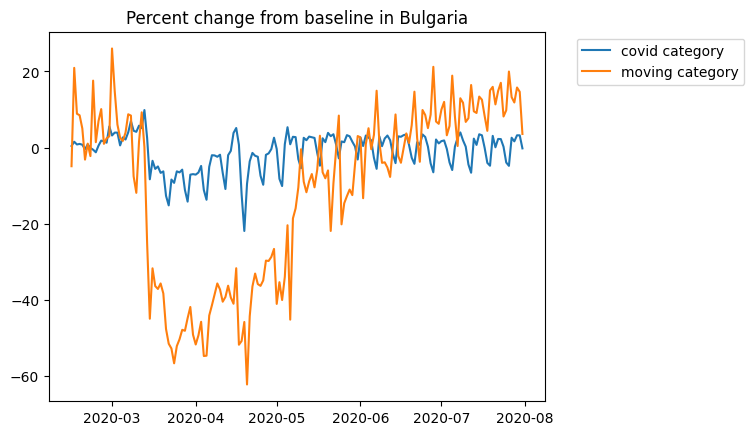

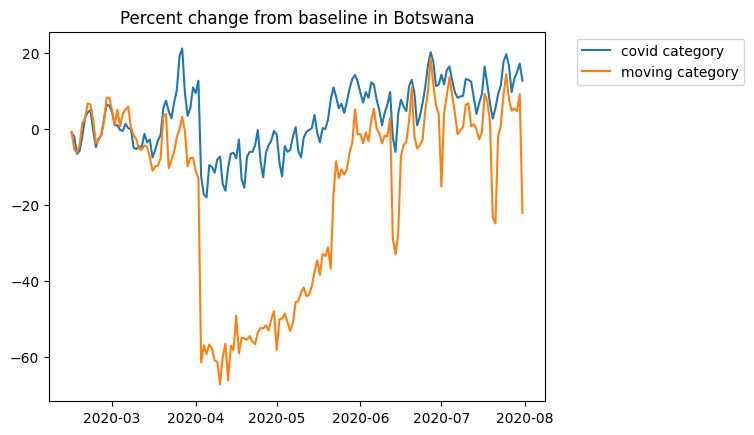

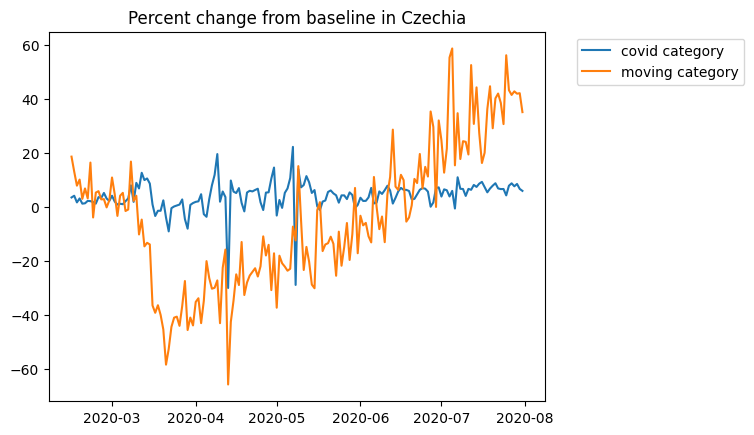

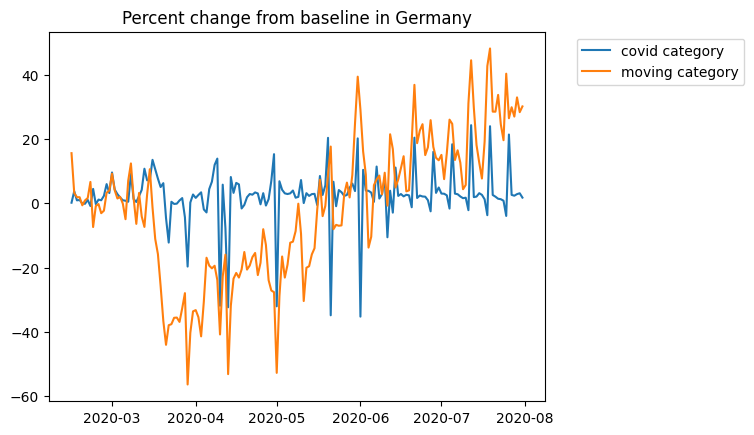

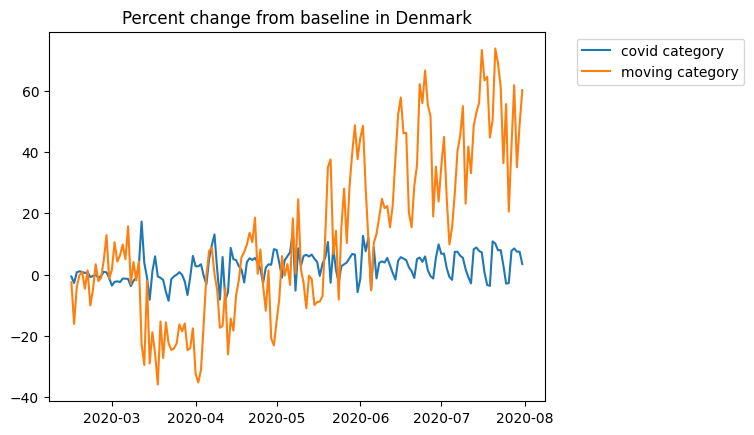

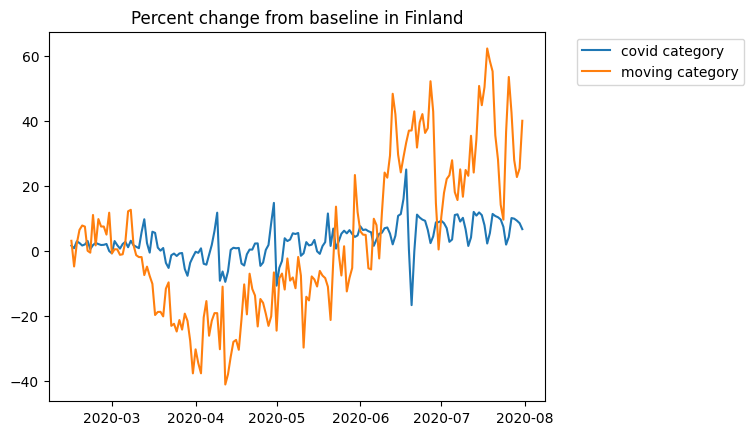

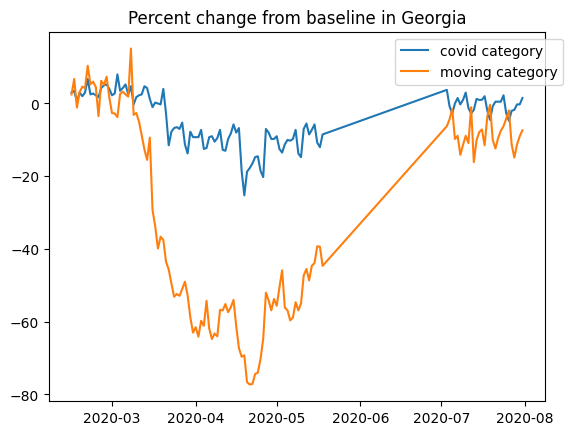

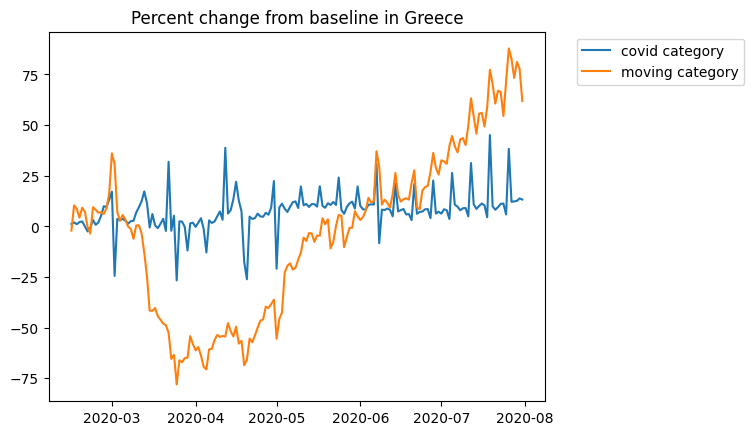

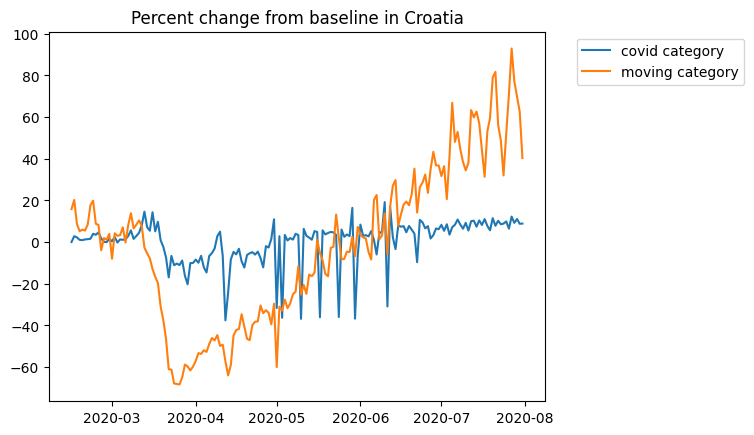

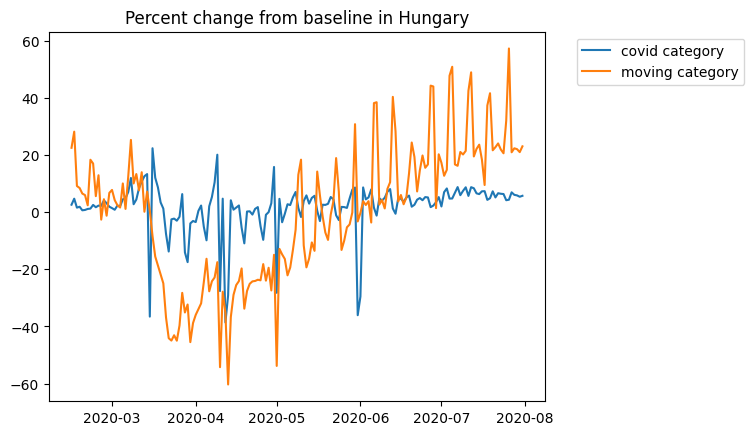

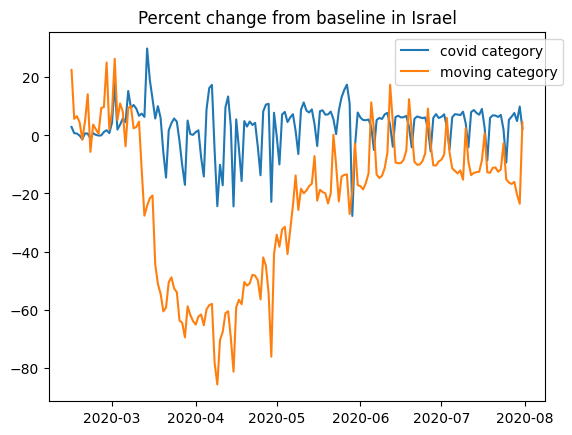

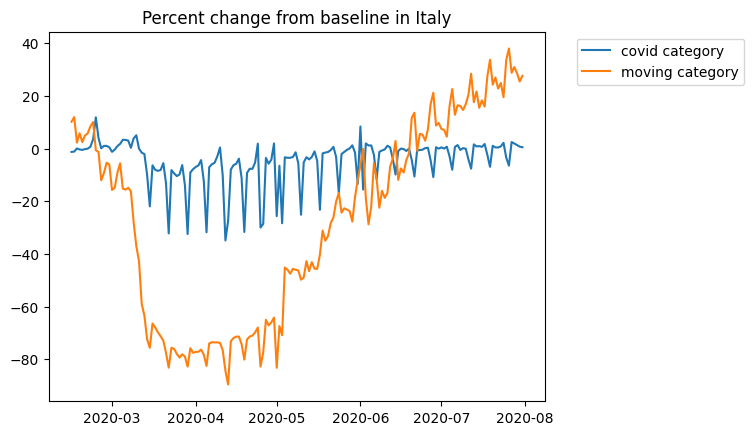

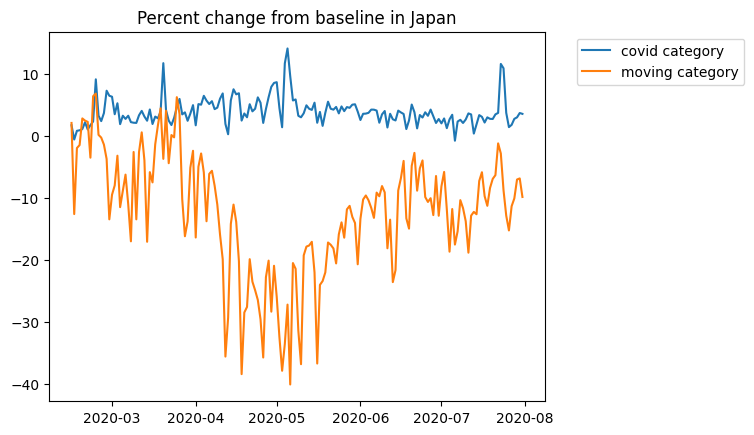

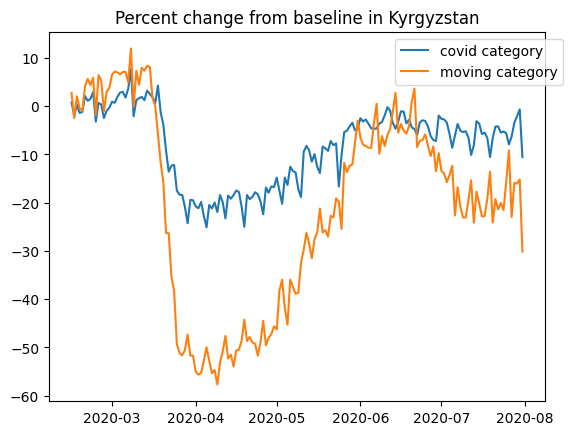

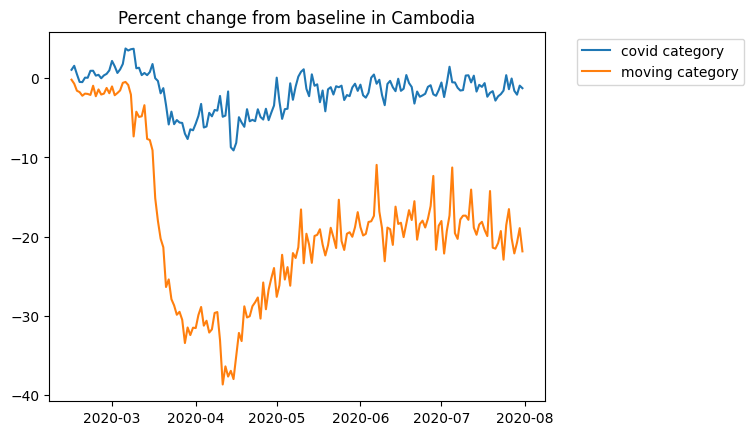

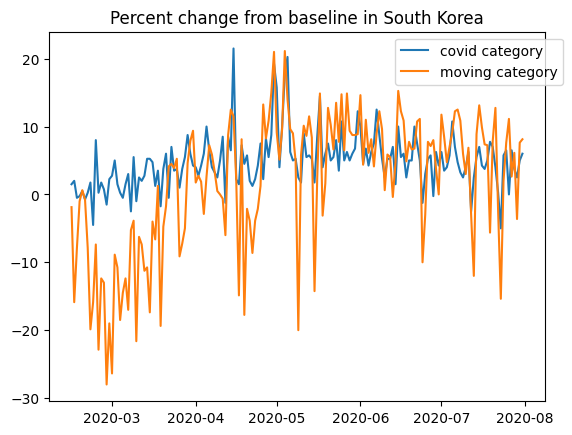

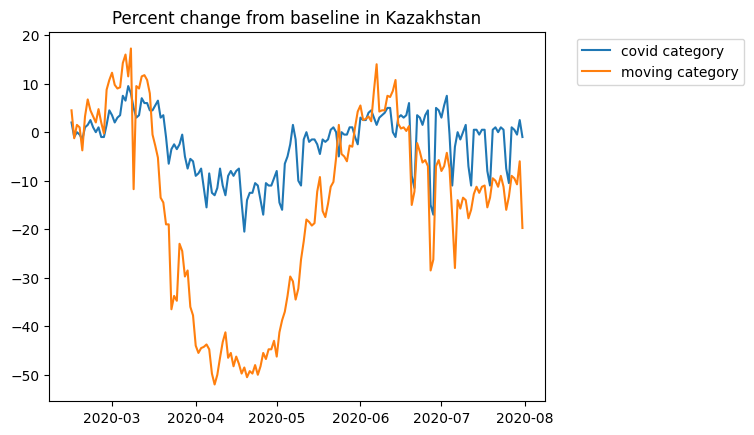

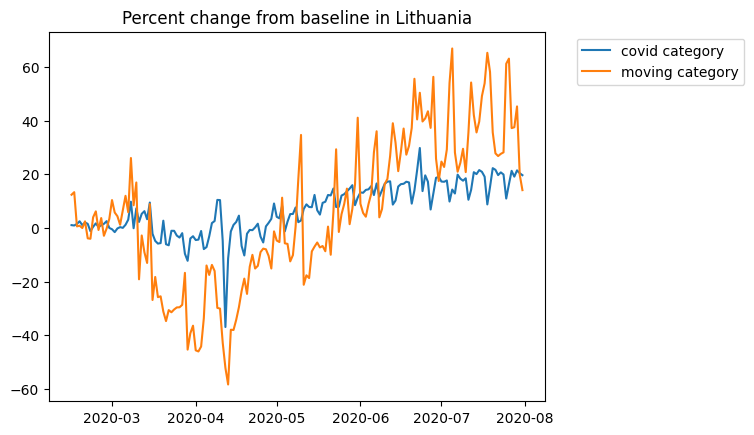

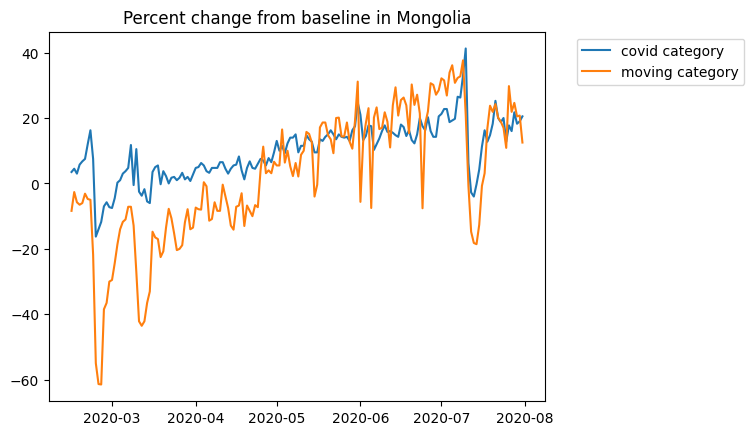

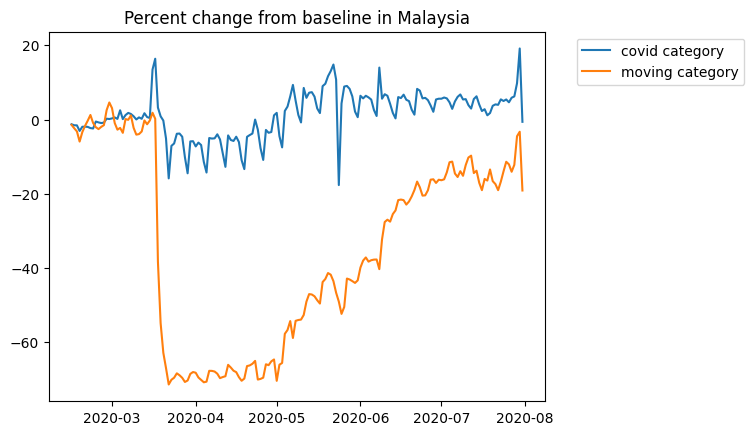

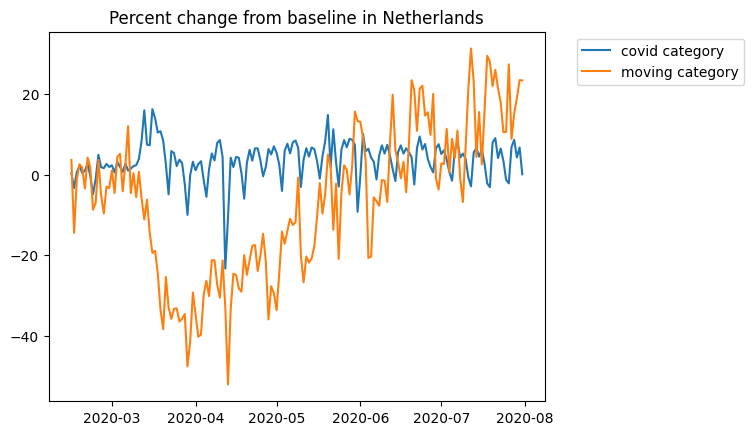

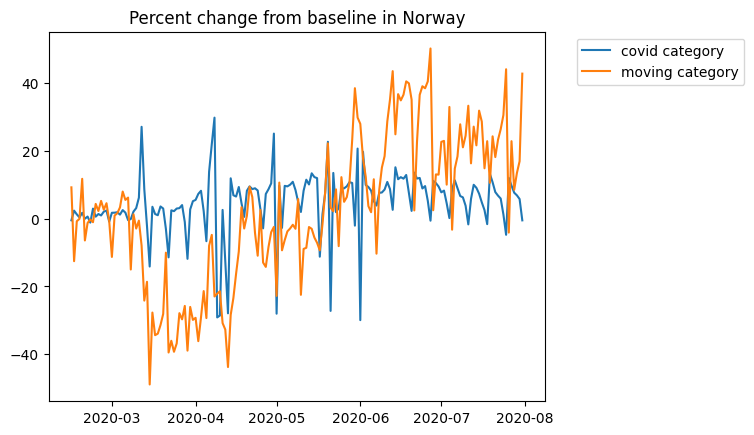

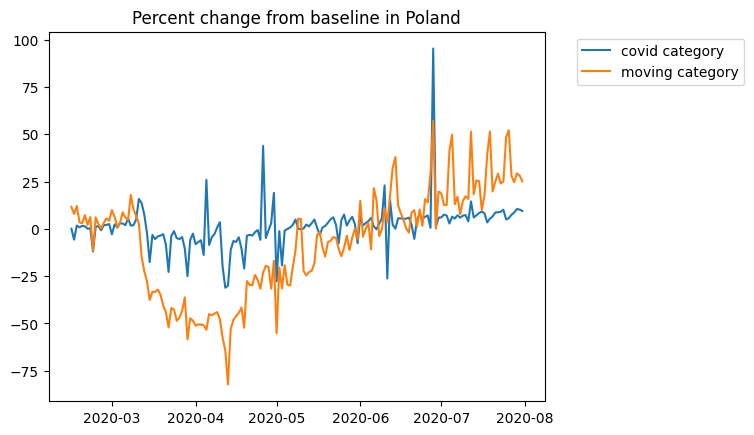

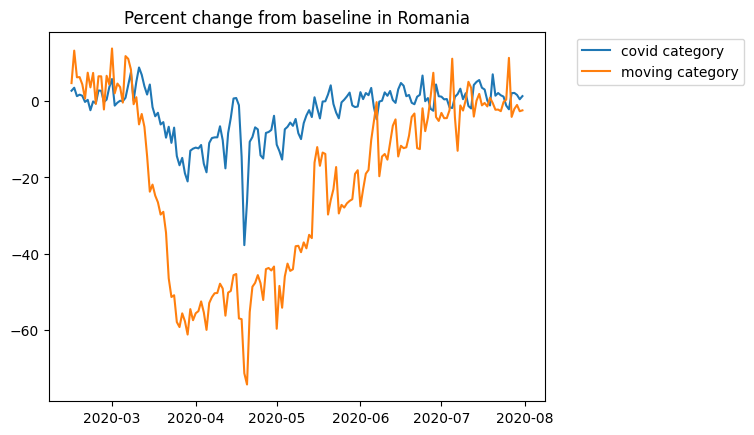

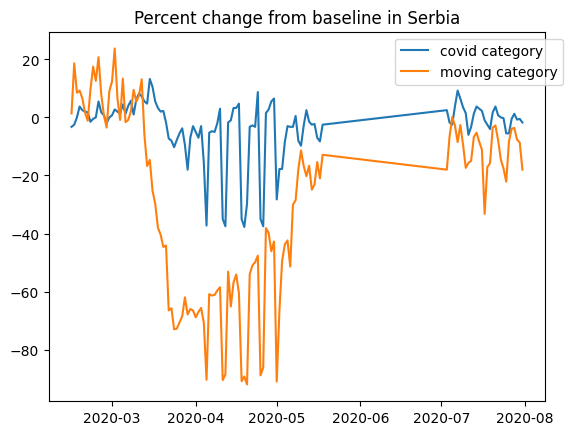

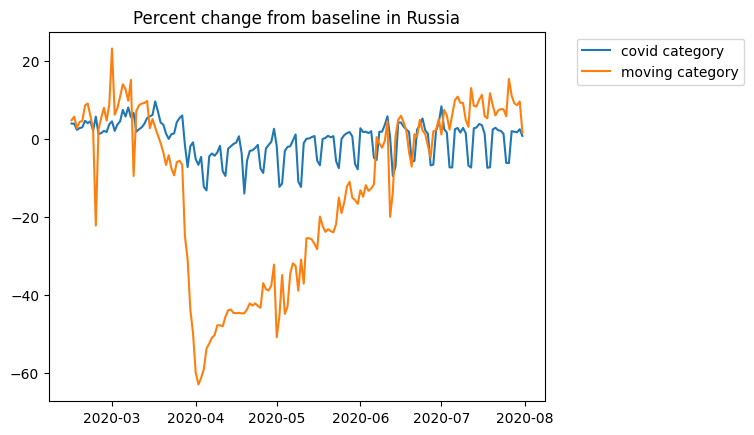

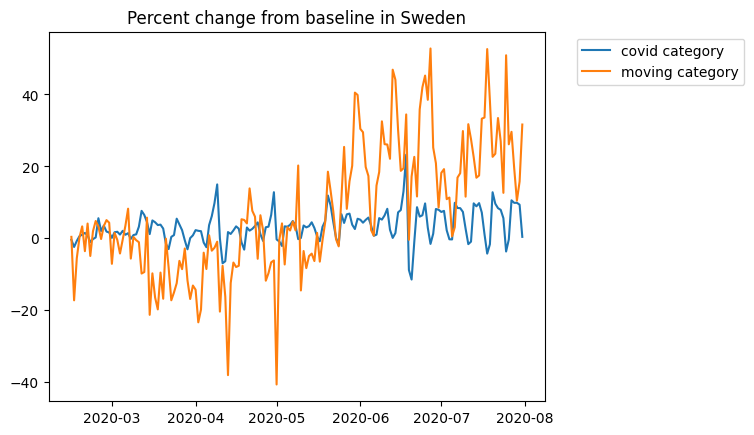

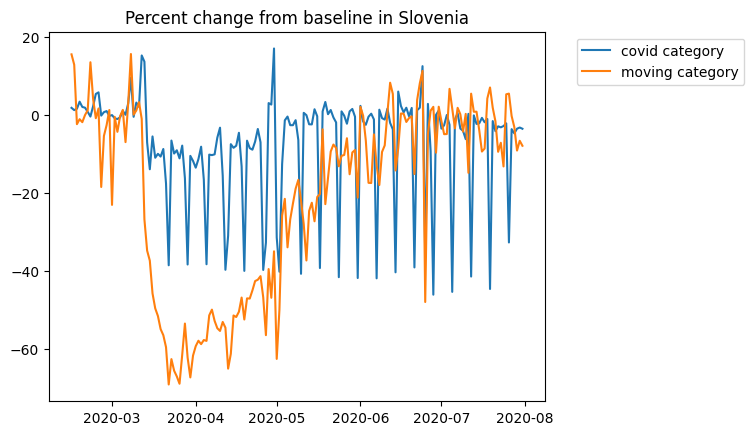

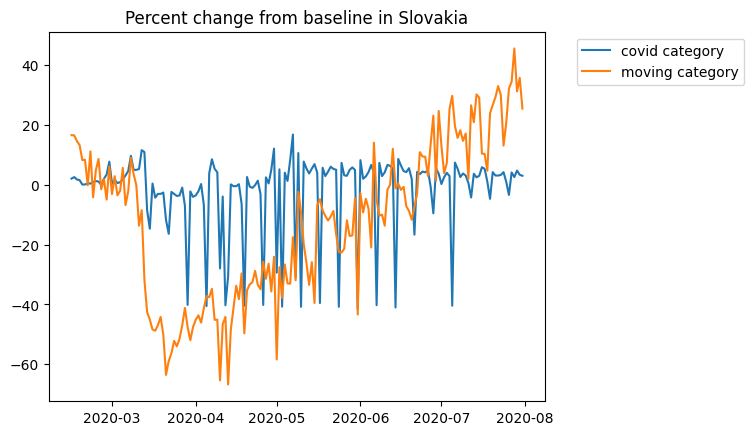

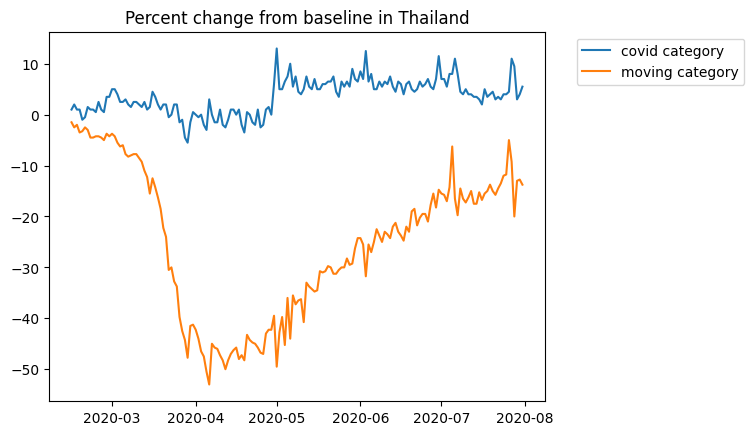

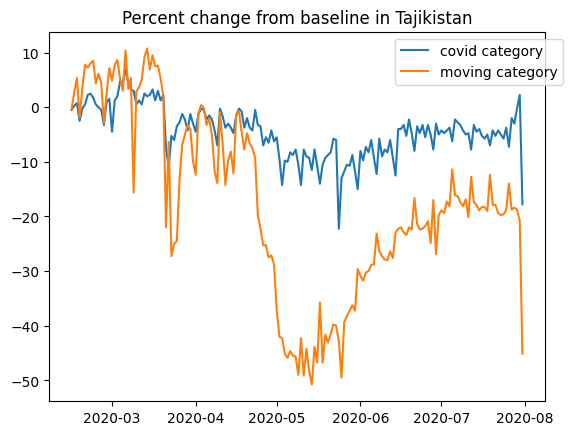

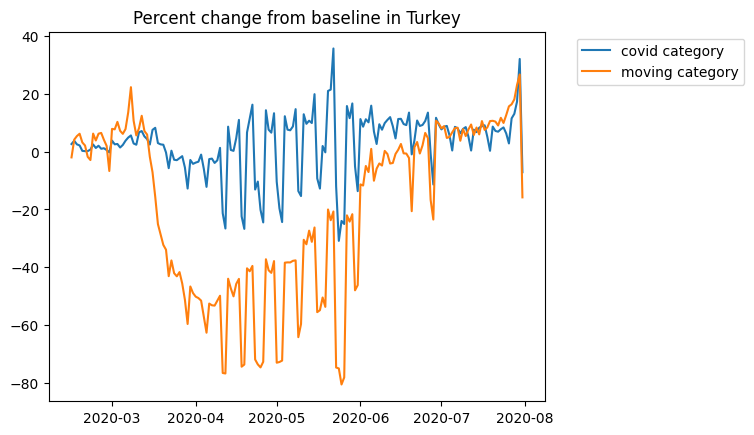

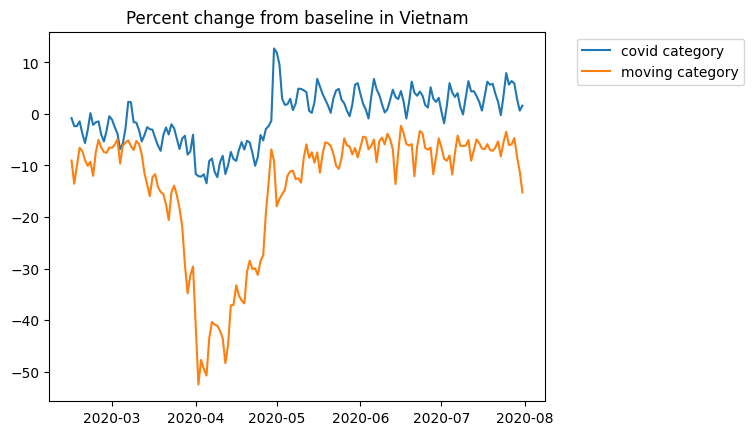

In [542]:
#Creating plot of the evolution per country of the mobility from baseline
for country in mobility.index.get_level_values('country_region').unique():
    for name in ['covid category', 'moving category']:
        data = mobility[mobility.index.get_level_values('country_region')==country]
        plt.plot(data.index.get_level_values('date'),data[name], label = name)
    plt.title("Percent change from baseline in {}".format(str(country)))
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

In [543]:
mobility_moving_median = mobility['moving category']
mobility_moving_median = mobility_moving_median.to_frame().groupby(['country_region_code', 'country_region']).agg('median')
mobility_moving_median = mobility_moving_median.reset_index()[['country_region', 'moving category']].set_index('country_region')
mobility_moving_median = mobility_moving_median.rename(index= country_dict)

mobility_covid_median = mobility['covid category']
mobility_covid_median = mobility_covid_median.to_frame().groupby(['country_region_code', 'country_region']).agg('median')
mobility_covid_median = mobility_covid_median.reset_index()[['country_region', 'covid category']].set_index('country_region')
mobility_covid_median = mobility_covid_median.rename(index= country_dict)



## Clustering Mobility moving/ Median pageviews/ Median cases

In [544]:
df_clustering_MedP_MedC_MobM = pd.concat([pageviews_median.to_frame().rename(columns= {0: 'Median pageview'}).transpose(), cases_median.to_frame().rename(columns= {0: 'Median cases'}).transpose(), mobility_mo_median.transpose()], axis= 0)
df_clustering_MedP_MedC_MobM = df_clustering_MedP_MedC_MobM.transpose().dropna()

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MedP_MedC_MobM.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 3)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MedP_MedC_MobM['cluster'] = kmeans.labels_

NameError: name 'mobility_mo_median' is not defined

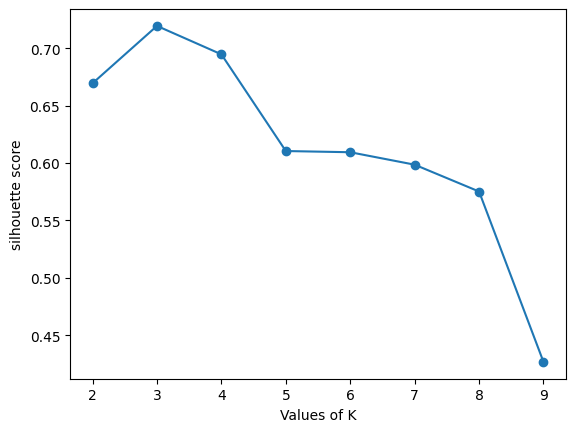

In [ ]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [ ]:

df_clustering_MedP_MedC_MobM = pd.concat([pageviews_median.to_frame().rename(columns= {0: 'Median pageview'}).transpose(), cases_median.to_frame().rename(columns= {0: 'Median cases'}).transpose(), mobility_moving_median.transpose()], axis= 0)
df_clustering_MedP_MedC_MobM = df_clustering_MedP_MedC_MobM.transpose().dropna()
training_data  = preprocessing.normalize(df_clustering_MedP_MedC_MobM.values)

# define the model
model = AffinityPropagation(damping=0.5)

# train the model
model.fit(training_data)

# assign each data point to a cluster
result = model.predict(training_data)

df_clustering_MedP_MedC_MobM['cluster'] = result

In [ ]:
PLOT = go.Figure()

for C in list(df_clustering_MedP_MedC_MobM.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MedP_MedC_MobM[df_clustering_MedP_MedC_MobM.cluster == C]["moving category"],
                                y = df_clustering_MedP_MedC_MobM[df_clustering_MedP_MedC_MobM.cluster == C]['Median pageview'],
                                z = df_clustering_MedP_MedC_MobM[df_clustering_MedP_MedC_MobM.cluster == C]['Median cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Mobility moving category', titlefont_color = 'black'),
                                yaxis=dict(title = 'Median pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Median cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Clustering Mobility moving/ Median pageviews

In [ ]:
df_clustering_MedP_MobM = pd.concat([pageviews_median.to_frame().rename(columns= {0: 'Median pageview'}).transpose(), mobility_moving_median.transpose()], axis= 0)
df_clustering_MedP_MobM = df_clustering_MedP_MobM.transpose().dropna()

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MedP_MobM.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MedP_MobM['cluster'] = kmeans.labels_

In [ ]:
#df_clustering_MedP_MobM = pd.concat([pageviews_median.to_frame().rename(columns= {0: 'Median pageview'}).transpose(), mobility_moving_median.transpose()], axis= 0)
#df_clustering_MedP_MobM = df_clustering_MedP_MobM.transpose().dropna()
#training_data  = preprocessing.normalize(df_clustering_MedP_MobM.values)

# define the model
#model = AffinityPropagation(damping=0.5)

# train the model
#model.fit(training_data)

# assign each data point to a cluster
#result = model.predict(training_data)

#df_clustering_MedP_MobM['cluster'] = result

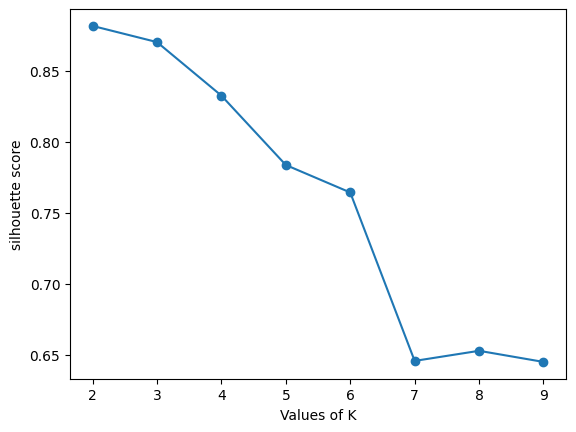

In [ ]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

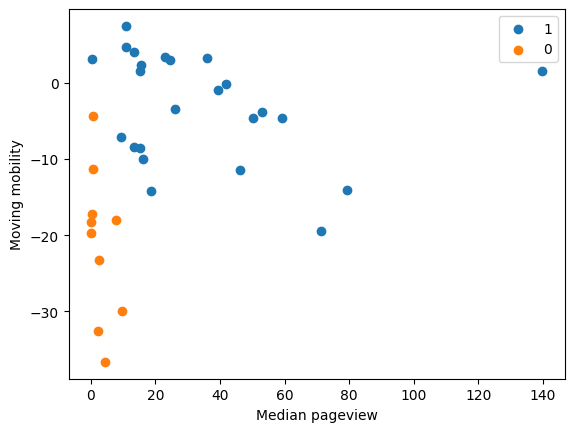

In [ ]:
#plot 2d
for i in list(df_clustering_MedP_MobM.cluster.unique()):
    plt.scatter(df_clustering_MedP_MobM[df_clustering_MedP_MobM.cluster == i]["Median pageview"], df_clustering_MedP_MobM[df_clustering_MedP_MobM.cluster == i]["moving category"], label = i)
plt.xlabel("Median pageview")
plt.ylabel("Moving mobility")
plt.legend()
plt.show()